In [1]:
%matplotlib inline
# All required dependencies for all plots 
import aplpy
from astropy.io import fits
from astropy.modeling import models
from astropy.visualization import simple_norm, AsinhStretch
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
from ChauvenetRMS import *
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.font_manager as fm
from matplotlib.patches import Ellipse, Rectangle
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from NOEMAsetup import *
import pandas as pd
import pickle
from pvextractor import PathFromCenter
import pyspeckit
from scipy import stats
from spectral_cube import SpectralCube
import velocity_tools.stream_lines as SL


# Map plots and results

In [2]:
def plot_aplpy_standard(image, stretch, vmin, vmax, cmap, phasecent=[ra_Per50, dec_Per50], vmid=0.01, figsize=(4,4), label_col='w', star_col='r'):
    fig = aplpy.FITSFigure(image, figsize=figsize)
    if stretch=='arcsinh':
        fig.show_colorscale(stretch=stretch, cmap=cmap, vmin=vmin, vmax=vmax, vmid=vmid)
    else:
        fig.show_colorscale(stretch=stretch, cmap=cmap, vmin=vmin, vmax=vmax)
    fig.add_colorbar()
    setup_plot_noema(fig, label_col=label_col, star_col=star_col)
    fig.beam.set_color('k')
    fig.scalebar.set_linewidth(2)
    return fig
  
def plot_aplpy_subfig(image, figure, subplotindex, stretch, vmin, vmax, cmap, phasecent=[ra_Per50, dec_Per50], vmid=0.01, label_col='w', star_col='r'):
    fig = aplpy.FITSFigure(image, figure=figure, subplot=subplotindex)
    if stretch=='arcsinh':
        fig.show_colorscale(stretch=stretch, cmap=cmap, vmin=vmin, vmax=vmax, vmid=vmid)
    else:
        fig.show_colorscale(stretch=stretch, cmap=cmap, vmin=vmin, vmax=vmax)
    fig.add_colorbar()
    setup_plot_noema(fig, label_col=label_col, star_col=star_col)
    fig.beam.set_color('k')
    fig.scalebar.set_linewidth(2)
    return fig
  
def v_kepler(mass, radius):
    vel = np.sqrt(G * mass / radius)
    return vel

## SO(55-44) plots

### Moment 0

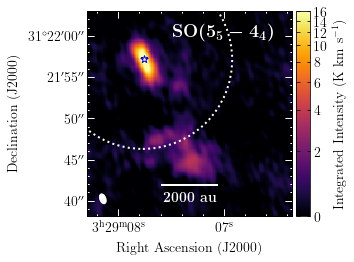

In [25]:
saveaction = 1
folder = 'figures/'
filename = SO_55_44_TdV_s
stretch = 'arcsinh'

# savefile = folder + 'Per-emb-50_SO_55_44_mom0_total_' +stretch + '_continuum.pdf'
savefile = folder + 'Per-emb-50_SO_55_44_mom0_total_' +stretch + '.pdf'
vmin = 0
vmax = 16
vmid = 2
cmap = 'inferno'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]
title = r'\textbf{SO(\boldmath$5_{5}-4_{4}$)}'

filename_continuum = continuum_selfcal
levels = [0.007]

continuum_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()
continuum_data = fits.getdata(filename_continuum+'.fits')[0]
hdu_cont = fits.PrimaryHDU(data=continuum_data, header=continuum_header)

fig = plot_aplpy_standard(filename + '.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.add_label(0.92,0.9, title, color='w',
               relative=True, horizontalalignment='right', size=18)
fig.scalebar.set_label(r'\textbf{2000 au}')
# fig.show_contour(hdu_cont, levels=levels, colors='w', linewidths=2, zorder=100)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.beam.set_frame(False)
fig.beam.set_color('w')
if saveaction:
    plt.savefig(savefile, dpi=300, bbox_inches='tight')

Text labels do not have attribute linewidth. Skipping.


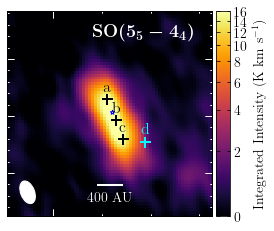

In [3]:
# zoom into regions for spectra
saveaction = 1
folder = 'figures/'
filename = SO_55_44_TdV_s
stretch = 'arcsinh'

savefile = folder + 'Per-emb-50_SO_55_44_mom0_total_' +stretch + '_zoom.pdf'
vmin = 0
vmax = 16
vmid = 2
cmap = 'inferno'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]
title = r'\textbf{SO(\boldmath$5_{5}-4_{4}$)}'
ang_size = (400 / 293) * u.arcsec

filename_continuum = continuum_selfcal
levels = [0.007]

filename_regions = 'figures/spectra_regs_SO_SO2.reg'

continuum_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()
continuum_data = fits.getdata(filename_continuum+'.fits')[0]
hdu_cont = fits.PrimaryHDU(data=continuum_data, header=continuum_header)

fig = plot_aplpy_standard(filename + '.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.add_label(0.92,0.9, title, color='w',
               relative=True, horizontalalignment='right', size=18)
fig.scalebar.set_label(r'\textbf{2000 au}')
fig.recenter(phasecent[0], phasecent[1], 0.0015)
# fig.show_contour(hdu_cont, levels=levels, colors='w', linewidths=2, zorder=100)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.beam.set_frame(False)
fig.beam.set_color('w')
fig._layers['star']._sizes = np.array([20])
fig._layers['star']._linewidths = np.array([1.])
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 AU')
fig.show_regions(filename_regions, zorder=10000000)
fig.tick_labels.hide()
fig.axis_labels.hide()


if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

{'_figure': <Figure size 288x288 with 2 Axes>,
 '_ax': <WCSAxesSubplot:xlabel='Right Ascension (J2000)', ylabel='Declination (J2000)'>,
 '_wcs': WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---ARC'  'DEC--ARC'  
 CRVAL : 52.28236666667  31.36586888889  
 CRPIX : 45.0  125.0  
 PC1_1 PC1_2  : 1.0  0.0  
 PC2_1 PC2_2  : 0.0  1.0  
 CDELT : -4.244444176815e-05  4.244444176815e-05  
 NAXIS : 163  163,
 'x': 0,
 'y': 1,
 'style': 'plain'}

#### SO Position-velocity diagram

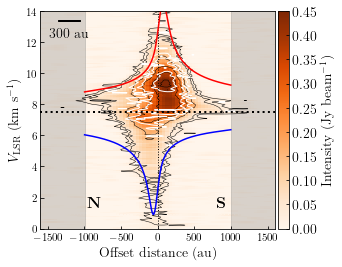

In [10]:
saveaction = 1

pvfile = SO_55_44_PV
savefile = 'figures/PVdiagram_SO_pvline_center_Per50_1arcsec_170PA_12arcsec_Sakai.pdf'
v_lsr = 7.48*u.km/u.s  # +- 0.14 km/s according to out C18O data
arcsectoau = 293  # * u.au / u.arcsec
pvdata = fits.getdata(pvfile+'.fits')
pvheader = fits.getheader(pvfile+'.fits')
rms = 0.01
contourlevels = np.array([3,5,15,25,35,45]) * rms
# contourlevels = np.array([3,5]) * rms
vmin = 0
vmax = 0.45

delta0 = pvheader['CRVAL1']
delta_delta = pvheader['CDELT1']
delta_pix0 = pvheader['CRPIX1']
delta_npix = pvheader['NAXIS1']
vel0 = pvheader['CRVAL2']
delta_vel = pvheader['CDELT2']
vel_pix0 = pvheader['CRPIX2']
vel_npix = pvheader['NAXIS2']

delta_array = np.array([delta0 + delta_delta*(i-delta_pix0) for i in range(delta_npix)]) * u.deg
vel_array = np.array([vel0 + delta_vel * (i - vel_pix0) for i in range(vel_npix)]) * u.m/u.s

# transformation to general coordinates
vel_array = vel_array.to(u.km/u.s)
mid_delta = delta_array[int(len(delta_array)/2+2-1)]
offset_array = (delta_array - mid_delta).to(u.arcsec)
distance_array = offset_array.value * arcsectoau * u.au

offset, vel = np.meshgrid(distance_array, vel_array)

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
norm = simple_norm(pvdata, 'linear', min_cut=vmin,max_cut=vmax)
pcolor = ax.pcolor(offset.value, vel.value, pvdata, shading='auto', norm=norm, cmap='Oranges', rasterized=True)
contours = ax.contour(offset.value, vel.value, pvdata, contourlevels, colors='k', linewidths=0.5)
fig.colorbar(pcolor, ax=ax, label=r'Intensity (Jy beam$^{-1}$)', pad=0.01)
    
ax.axhline(v_lsr.value, color='k', linestyle=':', linewidth=2)
ax.axvline(0, color='k', linestyle=':', linewidth=1)
ax.set_ylim([0, 14])
ax.set_ylabel(r'$V_{\mathrm{LSR}}$ (km s$^{-1}$)')
ax.set_xlim([-1600, 1600])
ax.set_xlabel('Offset distance (au)')
ax.set_xticks([-1500, -1000, -500, 0, 500, 1000, 1500])
ax.tick_params(labelsize=11)
ax.annotate(r'\textbf{N}', (0.2, 0.1), xycoords='axes fraction', color='k', size=16)
ax.annotate(r'\textbf{S}', (0.75, 0.1), xycoords='axes fraction', color='k', size=16)

bar = AnchoredSizeBar(ax.transData, 300, '300 au', 2, pad=0.1, borderpad=0.5, sep=5,  frameon=False, color='k', size_vertical=0.08)
ax.add_artist(bar)

df = pd.read_csv('analysis/Sakai_model_results.csv')
offset_model_plot = df['Offset_au']
velred = df['Vel_red']
velblue = df['Vel_blue']
line_vel_red, = ax.plot(offset_model_plot, velred, color='red', linestyle='-')
line_vel_blue, = ax.plot(offset_model_plot, velblue, color='blue', linestyle='-')

bar_transparent = ax.axvspan(-1600, np.amin(offset_model_plot), alpha=0.3, edgecolor='grey', facecolor='grey')
bar_transparent2 = ax.axvspan(np.amax(offset_model_plot), 1600, alpha=0.3, edgecolor='grey', facecolor='grey')

#SO2 contours
pvfile_cont = SO2_11_1_11_10_0_10_PV
pvdata_cont = fits.getdata(pvfile_cont+'.fits')
pvheader_cont = fits.getheader(pvfile_cont+'.fits')
delta0 = pvheader_cont['CRVAL1']
delta_delta = pvheader_cont['CDELT1']
delta_pix0 = pvheader_cont['CRPIX1']
delta_npix = pvheader_cont['NAXIS1']
vel0 = pvheader_cont['CRVAL2']
delta_vel = pvheader_cont['CDELT2']
vel_pix0 = pvheader_cont['CRPIX2']
vel_npix = pvheader_cont['NAXIS2']

delta_array = np.array([delta0 + delta_delta*(i-delta_pix0) for i in range(delta_npix)]) * u.deg
vel_array = np.array([vel0 + delta_vel * (i - vel_pix0) for i in range(vel_npix)]) * u.m/u.s

# transformation to general coordinates
vel_array = vel_array.to(u.km/u.s)
mid_delta = delta_array[int(len(delta_array)/2+2-1)]
offset_array = (delta_array - mid_delta).to(u.arcsec)
distance_array = offset_array.value * arcsectoau * u.au

offset, vel = np.meshgrid(distance_array, vel_array)

contours_cont = ax.contour(offset.value, vel.value, pvdata_cont, np.array([3,5,10])*rms, colors='white', linewidths=1)

if saveaction:
  plt.savefig(savefile, bbox_inches='tight', dpi=300)

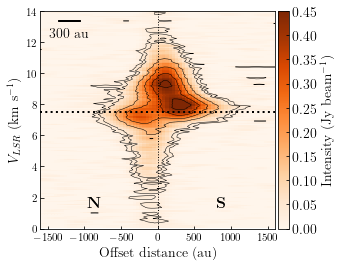

In [6]:
# PV diagram at a 180 angle

saveaction = 1

pvfile = 'SO_55_44/CDconfig/pvex_Per-emb-50_CD_l009l048_uvsub_SO_multi_pbcor_pvline_center_Per50_1arcsec_200PA_12arcsec_cutonly'
savefile = 'figures/PVdiagram_SO_pvline_center_Per50_1arcsec_200PA_12arcsec_test.pdf'
v_lsr = 7.48*u.km/u.s  # +- 0.14 km/s according to out C18O data
arcsectoau = 293  # * u.au / u.arcsec
pvdata = fits.getdata(pvfile+'.fits')
pvheader = fits.getheader(pvfile+'.fits')
rms = 0.01
contourlevels = np.array([3,5,15,25,35,45]) * rms
# contourlevels = np.array([3,5]) * rms
vmin = 0
vmax = 0.45


delta0 = pvheader['CRVAL1']
delta_delta = pvheader['CDELT1']
delta_pix0 = pvheader['CRPIX1']
delta_npix = pvheader['NAXIS1']
vel0 = pvheader['CRVAL2']
delta_vel = pvheader['CDELT2']
vel_pix0 = pvheader['CRPIX2']
vel_npix = pvheader['NAXIS2']

delta_array = np.array([delta0 + delta_delta*(i-delta_pix0) for i in range(delta_npix)]) * u.deg
vel_array = np.array([vel0 + delta_vel * (i - vel_pix0) for i in range(vel_npix)]) * u.m/u.s

# transformation to general coordinates
vel_array = vel_array.to(u.km/u.s)
mid_delta = delta_array[int(len(delta_array)/2+2-1)]
offset_array = (delta_array - mid_delta).to(u.arcsec)
distance_array = offset_array.value * arcsectoau * u.au

offset, vel = np.meshgrid(distance_array, vel_array)

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
norm = simple_norm(pvdata, 'linear', min_cut=vmin,max_cut=vmax)
pcolor = ax.pcolor(offset.value, vel.value, pvdata, shading='auto', norm=norm, cmap='Oranges')
contours = ax.contour(offset.value, vel.value, pvdata, contourlevels, colors='k', linewidths=0.5)
fig.colorbar(pcolor, ax=ax, label=r'Intensity (Jy beam$^{-1}$)', pad=0.01)
   
ax.axhline(v_lsr.value, color='k', linestyle=':', linewidth=2)
ax.axvline(0, color='k', linestyle=':', linewidth=1)
ax.set_ylim([0, 14])
ax.set_ylabel(r'$V_{LSR}$ (km s$^{-1}$)')
ax.set_xlim([-1600, 1600])
ax.set_xlabel('Offset distance (au)')
ax.set_xticks([-1500, -1000, -500, 0, 500, 1000, 1500])
ax.tick_params(labelsize=11)
ax.annotate(r'\textbf{N}', (0.2, 0.1), xycoords='axes fraction', color='k', size=16)
ax.annotate(r'\textbf{S}', (0.75, 0.1), xycoords='axes fraction', color='k', size=16)

bar = AnchoredSizeBar(ax.transData, 300, '300 au', 2, pad=0.1, borderpad=0.5, sep=5,  frameon=False, color='k', size_vertical=0.08)
ax.add_artist(bar)
if saveaction:
  plt.savefig(savefile, bbox_inches='tight', dpi=300)

### SO(55-44) 1- and 2-Gaussian fit

### SO with H2CO contours

/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
  cm.set_bad(color)
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


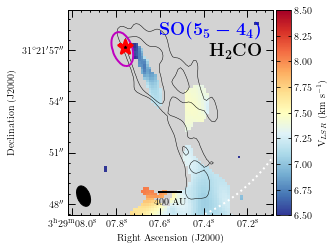

In [4]:
saveaction = 0

filename = 'SO_55_44/CDconfigsmall/Per-emb-50_CD_l009l048_uvsub_SO_multi_small_1G_streamer'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) * u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
# Here we choose the velocity
moment = paramcube[1]
title_SO = r'\textbf{SO(5\boldmath$_{5}-4_4)$}'
title_H2CO = r'\textbf{H\boldmath$_{2}$CO}'
vmin = 6.5
vmax = 8.5
cmap = 'RdYlBu_r'
ang_size = (400 / 293) * u.arcsec

filename_contour = H2CO_303_202_TdV_s
levels = np.array([3,5]) * 0.25 # K km/s

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.set_nan_color('lightgrey')
fig.colorbar.set_axis_label_text(r'V$_{LSR}$ (km s$^{-1}$)')
fig.show_contour(filename_contour+'.fits', levels=levels, colors='k', linewidths=0.5)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 AU')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='m', linewidths=2)
fig.recenter(52.2814707, 31.3648160, (6*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([200])
fig._layers['star']._linewidths = np.array([3.])
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.beam.set_frame(False)
fig.add_label(0.95,0.9, title_SO, color='b',
               relative=True, horizontalalignment='right', size=18)
fig.add_label(0.95,0.8, title_H2CO, color='k',
               relative=True, horizontalalignment='right', size=18)
if saveaction:
    savefile = filename + '_v_lsr_H2CO_cont.pdf'
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

### Plot SO different components

#### Single cell plots of the velocity and dispersion of each component

#### Streamer component fit

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
Text labels do not have attribute linewidth. Skipping.


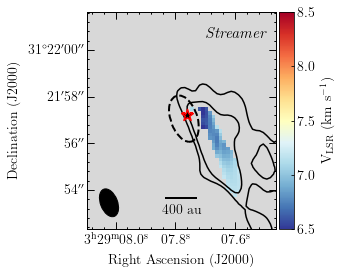

In [12]:
saveaction = 1

filename = SO_55_44_streamer
savefile = 'figures/SO_gaussiancomponents_streamer_v_lsr_H2CO_cont.pdf'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[1]

vmin = 6.5
vmax = 8.5
cmap = 'RdYlBu_r'
ang_size = (400 / 293) * u.arcsec
title = r'\textit{Streamer}'

filename_contour = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube_stream_mom0'
levels = np.array([3,5]) * 0.25 # K km/s

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.colorbar.set_axis_label_text(r'V$_{\mathrm{LSR}}$ (km s$^{-1}$)')
fig.colorbar.set_ticks([6.5,7,7.5,8,8.5])
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.show_contour(filename_contour+'.fits', levels=levels, colors='k')
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
# fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([150])
fig._layers['star']._linewidths = np.array([1.5])
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=16)

fig.beam.set_frame(False)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)
  

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.


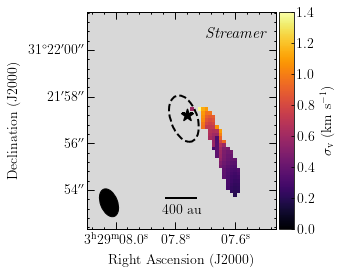

In [36]:
saveaction = 1

filename = SO_55_44_streamer
savefile = 'figures/SO_gaussiancomponents_streamer_sigma_v_H2CO_cont.pdf'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[2]

vmin = 0
vmax = 1.4
cmap = 'inferno'
ang_size = (400 / 293) * u.arcsec
title = r'\textit{Streamer}'

filename_contour = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube_stream_mom0'
levels = np.array([3,5]) * 0.25 # K km/s

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='k')
fig.colorbar.set_axis_label_text(r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)')
fig.set_nan_color(np.array([1,1,1])*0.85)
# fig.show_contour(filename_contour+'.fits', levels=levels, colors='k')
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
# fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([150])
fig._layers['star']._linewidths = np.array([1.5])
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=16)

fig.beam.set_frame(False)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

#### Rotation component fit

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
Text labels do not have attribute linewidth. Skipping.


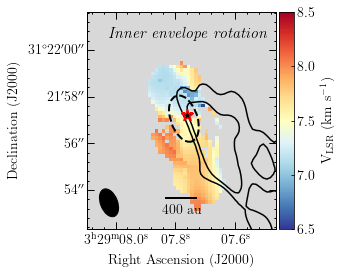

In [13]:
saveaction = 1

filename = SO_55_44_rot
savefile = 'figures/SO_gaussiancomponents_rotation_v_lsr_H2CO_cont.pdf'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[1]
moment[:,43:] = np.nan

vmin = 6.5
vmax = 8.5
cmap = 'RdYlBu_r'

filename_contour = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube_stream_mom0'
levels = np.array([3,5]) * 0.25 # K km/s

ang_size = (400 / 293) * u.arcsec
title = r'\textit{Inner envelope rotation}'

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.colorbar.set_axis_label_text(r'V$_{\mathrm{LSR}}$ (km s$^{-1}$)')
fig.colorbar.set_ticks([6.5,7,7.5,8,8.5])
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
fig.show_contour(filename_contour+'.fits', levels=levels, colors='k')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
# fig.recenter(ra_Per50.value+0.0001, dec_Per50.value-0.0002, width=(7*u.arcsec).to(u.deg).value, height=(8*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([150])
fig._layers['star']._linewidths = np.array([1.5])
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=16)

fig.beam.set_frame(False)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.


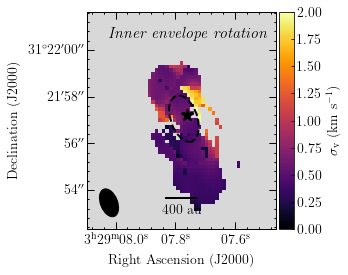

In [33]:
saveaction = 1

filename = SO_55_44_rot
savefile = 'figures/SO_gaussiancomponents_rotation_sigma_v_H2CO_cont.pdf'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[2]
moment[:,43:] = np.nan

vmin = 0
vmax = 2
cmap = 'inferno'

filename_contour = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube_stream_mom0'
levels = np.array([3,5]) * 0.25 # K km/s

ang_size = (400 / 293) * u.arcsec
title = r'\textit{Inner envelope rotation}'

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='k')
fig.colorbar.set_axis_label_text(r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)')
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
# fig.show_contour(filename_contour+'.fits', levels=levels, colors='k')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
# fig.recenter(ra_Per50.value+0.0001, dec_Per50.value-0.0002, width=(7*u.arcsec).to(u.deg).value, height=(8*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([150])
fig._layers['star']._linewidths = np.array([1.5])
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=16)

fig.beam.set_frame(False)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

#### Wing component fit

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
Text labels do not have attribute linewidth. Skipping.


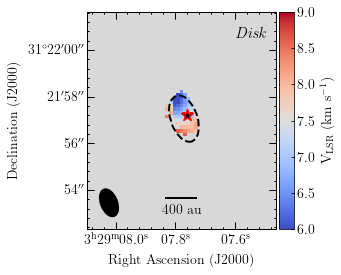

In [16]:
saveaction = 1

filename = SO_55_44_disk
savefile = 'figures/SO_gaussiancomponents_disk_v_lsr_H2CO_cont.pdf'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[1]

vmin = 6
vmax = 9
cmap = 'coolwarm'

ang_size = (400 / 293) * u.arcsec
title = r'\textit{Disk}'

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.colorbar.set_axis_label_text(r'V$_{\mathrm{LSR}}$ (km s$^{-1}$)')
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
# fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([150])
fig._layers['star']._linewidths = np.array([1.5])
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.beam.set_frame(False)
# if we want to show the outflow direction
# xx = 52.2823333
# yy = 31.3658889
# dx = 52.2830944 - xx
# dy = 31.36591 - yy
# fig.show_arrows(xx, yy, dx, dy, color='r')
# fig.show_arrows(xx, yy, -dx, -dy, color='b')
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=16)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.


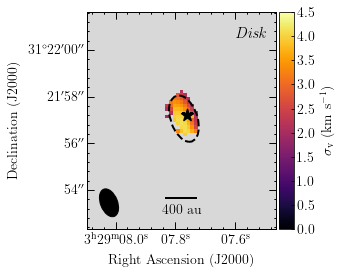

In [31]:
saveaction = 1

filename = SO_55_44_disk
savefile = 'figures/SO_gaussiancomponents_disk_sigma_v_H2CO_cont.pdf'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[2]

vmin = 0
vmax = 4.5
cmap = 'inferno'

ang_size = (400 / 293) * u.arcsec
title = r'\textit{Disk}'

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='k')
fig.colorbar.set_axis_label_text(r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)')
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
# fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([150])
fig._layers['star']._linewidths = np.array([1.5])
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.beam.set_frame(False)
# if we want to show the outflow direction
# xx = 52.2823333
# yy = 31.3658889
# dx = 52.2830944 - xx
# dy = 31.36591 - yy
# fig.show_arrows(xx, yy, dx, dy, color='r')
# fig.show_arrows(xx, yy, -dx, -dy, color='b')
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=16)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

#### Infall component fit

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
Text labels do not have attribute linewidth. Skipping.


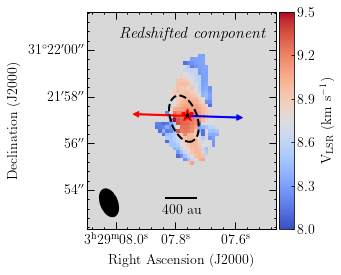

In [18]:
saveaction = 1

filename = SO_55_44_infall
savefile = 'figures/SO_gaussiancomponents_infall_v_lsr.pdf'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[1]

vmin = 8
vmax = 9.5
cmap = 'coolwarm'
xx = 52.2823333
yy = 31.3658889
dx = 52.2830944 - xx
dy = 31.36591 - yy
ang_size = (400 / 293) * u.arcsec
title = r'\textit{Redshifted component}'

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.colorbar.set_axis_label_text(r'V$_{\mathrm{LSR}}$ (km s$^{-1}$)')
fig.colorbar.set_ticks([8,8.3, 8.6, 8.9, 9.2, 9.5])
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
# fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([150])
fig._layers['star']._linewidths = np.array([1.5])
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.beam.set_frame(False)
# we want to show the outflow direction
fig.show_arrows(xx, yy, dx, dy, color='r')
fig.show_arrows(xx, yy, -dx, -dy, color='b')
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=16)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.


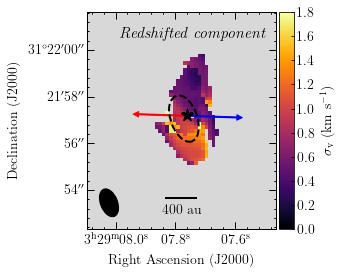

In [38]:
saveaction = 1

filename = SO_55_44_infall
savefile = 'figures/SO_gaussiancomponents_infall_sigma_v.pdf'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[2]

vmin = 0
vmax = 1.8
cmap = 'inferno'
xx = 52.2823333
yy = 31.3658889
dx = 52.2830944 - xx
dy = 31.36591 - yy
ang_size = (400 / 293) * u.arcsec
title = r'\textit{Redshifted component}'

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='k')
fig.colorbar.set_axis_label_text(r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)')
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
# fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([150])
fig._layers['star']._linewidths = np.array([1.5])
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.beam.set_frame(False)
# we want to show the outflow direction
fig.show_arrows(xx, yy, dx, dy, color='r')
fig.show_arrows(xx, yy, -dx, -dy, color='b')
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=16)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

### Plot of each component with parameters (for appendix)

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.
You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.


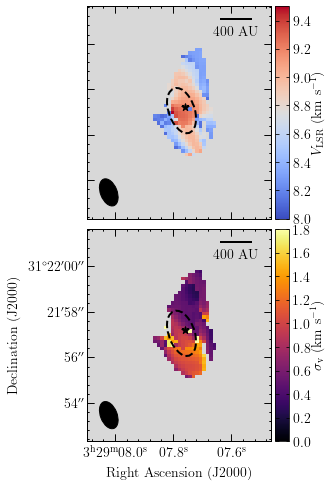

In [8]:
# Infall (?)
saveaction = 1

filename = SO_55_44_infall
savefile = 'figures/SO_parameters_infall_a_v_sigma.pdf'
stretch = 'linear'
cmap = ['coolwarm', 'inferno']
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

vmin = [8, 0.]
vmax = [9.5, 1.8]
ang_size = (400 / 293) * u.arcsec
colorbarlabel = [r'$V_{\mathrm{LSR}}$ (km s$^{-1}$)', r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)']

fig = plt.figure(figsize=(4,8))
for i in range(1,3):
    component1 = fits.PrimaryHDU(data=paramcube[i],header=header)
    gc1 = plot_aplpy_subfig(component1, fig, (2,1,i), stretch, vmin[i-1], vmax[i-1], cmap[i-1], label_col='k', star_col='k')
    gc1.set_nan_color(np.array([1,1,1])*0.85)
    gc1.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
    gc1.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls='--', color='w', lw=2)
    gc1.scalebar.set_corner('top right')
    gc1.scalebar.set_length(ang_size)
    gc1.scalebar.set_label('400 AU')
    gc1.colorbar.set_axis_label_text(colorbarlabel[i-1])
    gc1.colorbar.set_axis_label_pad(0.0)
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    gc1.beam.set_frame(False)

    if i==1:
        gc1.tick_labels.hide()
        gc1.axis_labels.hide()
#         gc1.colorbar.set_ticks([6.5, 7,7.5,8,8.5])
#     if i==2:
# #         gc1.colorbar.set_ticks([0,0.15,0.3,0.45,0.6,0.75])
fig.subplots_adjust(hspace=0.05)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)


You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.
You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.


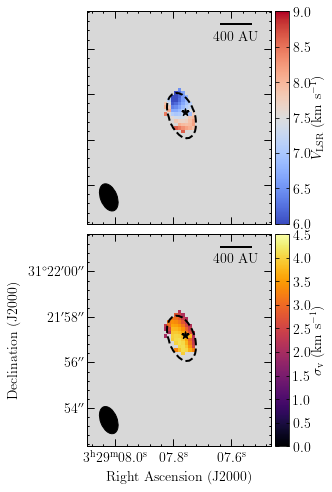

In [9]:
# Wings: disk
saveaction = 1

filename = SO_55_44_disk
savefile = 'figures/SO_parameters_disk_a_v_sigma.pdf'
stretch = 'linear'
cmap = ['coolwarm', 'inferno']
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

vmin = [6, 0.]
vmax = [9, 4.5]
ang_size = (400 / 293) * u.arcsec
colorbarlabel = [r'$V_{\mathrm{LSR}}$ (km s$^{-1}$)', r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)']

fig = plt.figure(figsize=(4,8))
for i in range(1,3):
    component1 = fits.PrimaryHDU(data=paramcube[i],header=header)
    gc1 = plot_aplpy_subfig(component1, fig, (2,1,i), stretch, vmin[i-1], vmax[i-1], cmap[i-1], label_col='k', star_col='k')
    gc1.set_nan_color(np.array([1,1,1])*0.85)
    gc1.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
    gc1.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls='--', color='w', lw=2)
    gc1.scalebar.set_corner('top right')
    gc1.scalebar.set_length(ang_size)
    gc1.scalebar.set_label('400 AU')
    gc1.colorbar.set_axis_label_text(colorbarlabel[i-1])
    gc1.colorbar.set_axis_label_pad(0.0)
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    gc1.beam.set_frame(False)

    if i==1:
        gc1.tick_labels.hide()
        gc1.axis_labels.hide()
#         gc1.colorbar.set_ticks([6.5, 7,7.5,8,8.5])
#     if i==2:
# #         gc1.colorbar.set_ticks([0,0.15,0.3,0.45,0.6,0.75])
fig.subplots_adjust(hspace=0.05)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.
You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.


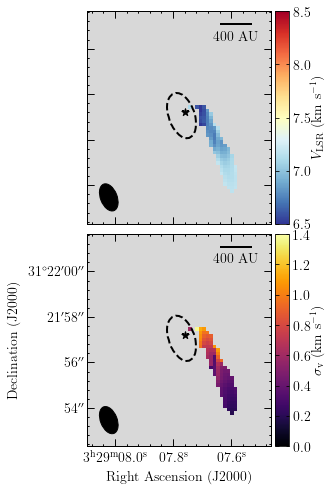

In [10]:
# streamer
saveaction = 1

filename = SO_55_44_streamer
savefile = 'figures/SO_parameters_streamer_a_v_sigma.pdf'
stretch = 'linear'
cmap = ['RdYlBu_r', 'inferno']
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

vmin = [6.5, 0.]
vmax = [8.5, 1.4]
ang_size = (400 / 293) * u.arcsec
colorbarlabel = [r'$V_{\mathrm{LSR}}$ (km s$^{-1}$)', r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)']

fig = plt.figure(figsize=(4,8))
for i in range(1,3):
    component1 = fits.PrimaryHDU(data=paramcube[i],header=header)
    gc1 = plot_aplpy_subfig(component1, fig, (2,1,i), stretch, vmin[i-1], vmax[i-1], cmap[i-1], label_col='k', star_col='k')
    gc1.set_nan_color(np.array([1,1,1])*0.85)
    gc1.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
    gc1.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls='--', color='w', lw=2)
    gc1.scalebar.set_corner('top right')
    gc1.scalebar.set_length(ang_size)
    gc1.scalebar.set_label('400 AU')
    gc1.colorbar.set_axis_label_text(colorbarlabel[i-1])
    gc1.colorbar.set_axis_label_pad(0.0)
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    gc1.beam.set_frame(False)

    if i==1:
        gc1.tick_labels.hide()
        gc1.axis_labels.hide()
        gc1.colorbar.set_ticks([6.5, 7,7.5,8,8.5])
#     if i==2:
# #         gc1.colorbar.set_ticks([0,0.15,0.3,0.45,0.6,0.75])
fig.subplots_adjust(hspace=0.05)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.
You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.


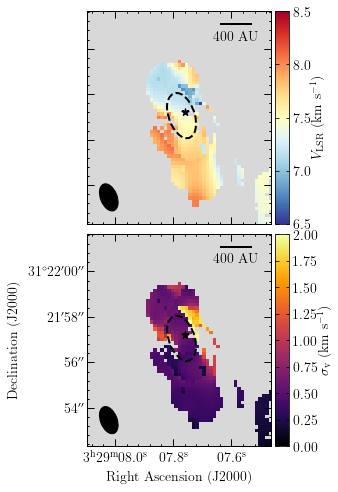

In [11]:
# Rotation
saveaction = 1

filename = SO_55_44_rot
savefile = 'figures/SO_parameters_rotation_a_v_sigma.pdf'
stretch = 'linear'
cmap = ['RdYlBu_r', 'inferno']
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

vmin = [6.5, 0.]
vmax = [8.5, 2]
ang_size = (400 / 293) * u.arcsec
colorbarlabel = [r'$V_{\mathrm{LSR}}$ (km s$^{-1}$)', r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)']

fig = plt.figure(figsize=(4,8))
for i in range(1,3):
    component1 = fits.PrimaryHDU(data=paramcube[i],header=header)
    gc1 = plot_aplpy_subfig(component1, fig, (2,1,i), stretch, vmin[i-1], vmax[i-1], cmap[i-1], label_col='k', star_col='k')
    gc1.set_nan_color(np.array([1,1,1])*0.85)
    gc1.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
    gc1.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls='--', color='w', lw=2)
    gc1.scalebar.set_corner('top right')
    gc1.scalebar.set_length(ang_size)
    gc1.scalebar.set_label('400 AU')
    gc1.colorbar.set_axis_label_text(colorbarlabel[i-1])
    gc1.colorbar.set_axis_label_pad(0.0)
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    gc1.beam.set_frame(False)

    if i==1:
        gc1.tick_labels.hide()
        gc1.axis_labels.hide()
        gc1.colorbar.set_ticks([6.5, 7,7.5,8,8.5])
#     if i==2:
# #         gc1.colorbar.set_ticks([0,0.15,0.3,0.45,0.6,0.75])
fig.subplots_adjust(hspace=0.05)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

#### Plot delta v of SO streamer component and H2CO streamer component

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
Text labels do not have attribute linewidth. Skipping.


0.36768418399107716


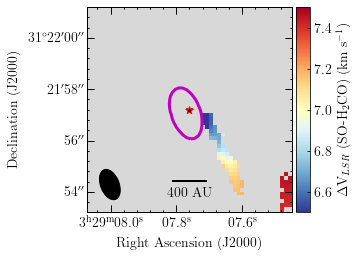

In [148]:
saveaction = 0

filename_H2CO = H2CO_303_202_fit_Vc
filename_SO = 'SO_55_44/CDconfigsmall/Per-emb-50_CD_l009l048_uvsub_SO_multi_small_1G_streamer_reprojectH2COsmall'
savefile = 'SO_55_44/CDconfigsmall/difference_vlsr_H2CO_SO.pdf'
H2CO_data = fits.getdata(filename_H2CO+'.fits')
SO_data = fits.getdata(filename_SO+'.fits')
header = fits.getheader(filename_H2CO+'.fits')
phasecent = np.array([header['ra'], header['dec']]) *u.deg
freq = header['restfreq'] * u.Hz
stretch= 'linear'

# vmin = -0.4
# vmax = 0.4
vmin = 6.5
vmax = 7.5
cmap = 'RdYlBu_r'

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

ang_size = (400 / 293) * u.arcsec
# mapdata = SO_data-H2CO_data
mapdata = np.mean([SO_data, H2CO_data], axis=0)
fig = plot_aplpy_standard(fits.PrimaryHDU(data=mapdata, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.colorbar.set_axis_label_text(r'$\Delta$V$_{LSR}$ (SO-H$_2$CO) (km s$^{-1}$)')
fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='m', linewidths=3)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 AU')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.beam.set_frame(False)
print(np.nanmax(SO_data-H2CO_data))



# if saveaction:
#   plt.savefig(savefile, bbox_inches='tight', dpi=300)

#### Plot of H2CO and SO mean velocity on the streamer


<ipython-input-16-440012d4ee1d>:23: RuntimeWarning: Mean of empty slice
  plotdata = np.nanmean([SO_data, H2CO_data], axis=0)
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
  cm.set_bad(color)
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


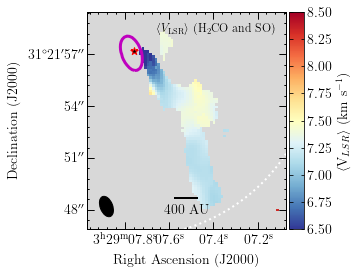

In [16]:
saveaction = 1

filename_H2CO = H2CO_303_202_fit_Vc
filename_SO = 'SO_55_44/CDconfigsmall/Per-emb-50_CD_l009l048_uvsub_SO_multi_small_1G_streamer_reprojectH2COsmall'
savefile = 'SO_55_44/CDconfigsmall/mean_vlsr_H2CO_SO.pdf'
H2CO_data = fits.getdata(filename_H2CO+'.fits')
SO_data = fits.getdata(filename_SO+'.fits')
header = fits.getheader(filename_H2CO+'.fits')
phasecent = np.array([header['ra'], header['dec']]) *u.deg
freq = header['restfreq'] * u.Hz

vmin = 6.5
vmax = 8.5
cmap = 'RdYlBu_r'
stretch = 'linear'

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

ang_size = (400 / 293) * u.arcsec
SO_data[:93] = np.nan
plotdata = np.nanmean([SO_data, H2CO_data], axis=0)
title_SO = r'$\langle V_{\mathrm{LSR}}\rangle$ (H$_2$CO and SO)'

fig = plot_aplpy_standard(fits.PrimaryHDU(data=plotdata, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
# fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig.set_nan_color(np.array([1,1,1])*0.85)
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='m', linewidths=3)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 AU')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.colorbar.set_axis_label_text(r'$\langle$V$_{LSR}\rangle$ (km s$^{-1}$)')
fig.recenter(52.2813459, 31.3647663, width=0.0032, height=0.0035)
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.beam.set_frame(False)
fig.add_label(0.95,0.92, title_SO, color='k',
               relative=True, horizontalalignment='right', size=12)

if saveaction:
  plt.savefig(savefile, bbox_inches='tight', dpi=300)

### SO with H2CO and C18O spectra at the kink

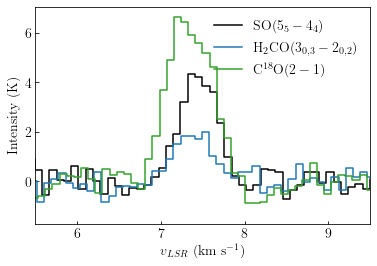

In [12]:
saveaction = 1
folder = 'SO_55_44/CDconfig/'
filename = folder+'Per-emb-50_CD_l009l048_uvsub_SO_multi_pbcor'
cube = SpectralCube.read(filename+'.fits').with_spectral_unit(u.km/u.s).to(u.K)
wcscel = cube.wcs.celestial
x, y = wcscel.all_world2pix([52.2810100],[31.3649452],0)
spectra = cube[:,int(y[0]),int(x[0])]
vel = cube.spectral_axis.value

savefile = filename+'_sample_spectra_kink.pdf'

filename_H2CO = 'H2CO/CDconfig/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_pbcor'
filename_C18O = 'C18O/CDconfig/JEP/JEP_mask_multi_Per-emb-50_CD_l025l064_uvsub_C18O_pbcor'
cubeH2CO = SpectralCube.read(filename_H2CO+'.fits').with_spectral_unit(u.km/u.s).to(u.K)
wcscel = cubeH2CO.wcs.celestial
x, y = wcscel.all_world2pix([52.2810100],[31.3649452],0)
spectraH2CO = cubeH2CO[:,int(y[0]),int(x[0])]
velH2CO = cubeH2CO.spectral_axis.value

cubeC18O = SpectralCube.read(filename_C18O+'.fits').with_spectral_unit(u.km/u.s).to(u.K)
wcscel = cubeC18O.wcs.celestial
x, y = wcscel.all_world2pix([52.2810100],[31.3649452],0)
spectraC18O = cubeC18O[:,int(y[0]),int(x[0])]
velC18O = cubeC18O.spectral_axis.value

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(vel,spectra,drawstyle='steps-mid', color='k', label=r'SO($5_5-4_4$)')
ax.plot(velH2CO,spectraH2CO,drawstyle='steps-mid', color='#1f78b4', label=r'H$_2$CO($3_{0,3}-2_{0,2}$)')
ax.plot(velC18O,spectraC18O,drawstyle='steps-mid', color='#33a02c', label=r'C$^{18}$O($2-1$)')
ax.set_xlabel(r'$v_{LSR}$ (km s$^{-1}$)')
ax.set_ylabel(r'Intensity (K)')
ax.set_xlim([5.5,9.5])
ax.legend(frameon=False)
# ax.annotate(r'\textbf{H\boldmath$_{2}$CO($3_{0,3}-2_{0,2}$)}',(0.6,0.9), xycoords='axes fraction', color='k', size=14)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

## H2CO Plots

### Moment 0

/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


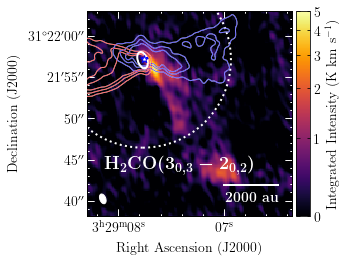

In [4]:
saveaction = 1

folder = 'figures/'
filename = H2CO_303_202_TdV_s
cleanalg = 'Multi'
stretch = 'arcsinh'

filename_continuum = continuum_selfcal
levels = [0.007]

continuum_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()
continuum_data = fits.getdata(filename_continuum+'.fits')[0]
hdu_cont = fits.PrimaryHDU(data=continuum_data, header=continuum_header)

savefile = folder + 'H2CO_'+cleanalg+'_fitcube_total_mom0_labeled_continuum' + stretch + '_withoutflow.pdf'
vmin = 0
vmax = 5
vmid = 1
cmap = 'inferno'
title = r'\textbf{H\boldmath$_{2}$CO($3_{0,3}-2_{0,2}$)}'

contourblue = CO21blue
contourred = CO21red
levelblue = levelred =[8, 16, 24]

contourbluedata = fits.getdata(CO21blue+'.fits')
contourbluehead = fits.getheader(CO21blue+'.fits')
contourreddata = fits.getdata(CO21red+'.fits')
contourredhead = fits.getheader(CO21red+'.fits')

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_label(r'\textbf{2000 au}')
fig.add_label(0.82,0.25, title, color='w',
               relative=True, horizontalalignment='right', size=18)
fig.show_contour(hdu_cont, levels=levels, colors='w', linewidths=2, zorder=100)
# fig.show_contour(contourblue+'.fits', levels=levelblue, colors='b', linewidths = 1, zorder=21)
fig.show_contour(fits.PrimaryHDU(contourbluedata, contourbluehead), levels=levelblue, colors='b', linewidths = 0.5, zorder=21)
fig.show_contour(fits.PrimaryHDU(contourreddata, contourredhead), levels=levelred, colors='r', linewidths = 0.5, zorder=21)
fig.show_contour(fits.PrimaryHDU(contourbluedata, contourbluehead), levels=levelblue, colors='w', linewidths = 1, zorder=11)
fig.show_contour(fits.PrimaryHDU(contourreddata, contourredhead), levels=levelred, colors='w', linewidths = 1, zorder=11)
fig.beam.set_frame(False)
fig.beam.set_color('w')
if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)


#### Plot H2CO and SO together to save space in paper

Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.


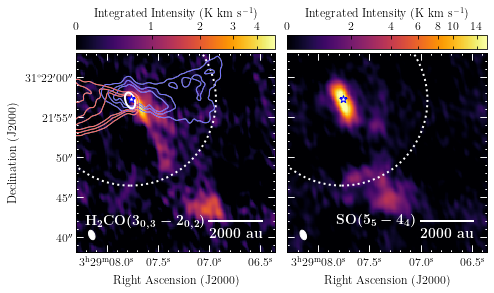

In [36]:
saveaction = 1
folder = 'figures/'
filenames = [H2CO_303_202_TdV_s, SO_55_44_TdV_s]
stretch = 'arcsinh'
savefile = folder + 'Per-emb-50_H2CO_SO_fig1.pdf'
vmin = 0
vmax = [5, 16]
vmid = [1, 2]
cmap = 'inferno'

# load info on the primary beam
headercube = fits.getheader(filenames[0]+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]
title = [r'\textbf{H\boldmath$_{2}$CO($3_{0,3}-2_{0,2}$)}', r'\textbf{SO(\boldmath$5_{5}-4_{4}$)}']

# load info on the continuum
filename_continuum = continuum_selfcal
levels = [0.007]
continuum_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()
continuum_data = fits.getdata(filename_continuum+'.fits')[0]
hdu_cont = fits.PrimaryHDU(data=continuum_data, header=continuum_header)

# load info on the outflows
contourblue = CO21blue
contourred = CO21red
levelblue = levelred =[8, 16, 24]
contourbluedata = fits.getdata(CO21blue+'.fits')
# contourbluedata[:80] = np.nan
contourbluehead = fits.getheader(CO21blue+'.fits')
contourreddata = fits.getdata(CO21red+'.fits')
# contourreddata[:,120:] = np.nan
contourredhead = fits.getheader(CO21red+'.fits')

#prepare the figure
fig = plt.figure(figsize=(8,4))
#plot each axis
for i, filename in enumerate(filenames): 
    gc1 = plot_aplpy_subfig(filename+'.fits', fig, (1,2,i+1), stretch, vmin, vmax[i], cmap, vmid=vmid[i], label_col='w', star_col='b')
    gc1.colorbar.set_location('top')
    gc1.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
    gc1.scalebar.set_corner('bottom right')
    gc1.scalebar.set_label(r'\textbf{2000 au}')
    gc1.beam.set_frame(False)
    gc1.beam.set_color('w')
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    gc1.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
    gc1.colorbar.set_axis_label_font(size=12)
    gc1.colorbar._ticklabel_fontproperties._size = 12
    gc1.axis_labels.set_font(size=12)
    gc1.tick_labels.set_font(size=12)
    gc1.add_label(0.65,0.16, title[i], color='w', relative=True, horizontalalignment='right', size=14)
    if not i:
        gc1.show_contour(hdu_cont, levels=levels, colors='w', linewidths=2, zorder=100)
        gc1.show_contour(fits.PrimaryHDU(contourbluedata, contourbluehead), levels=levelblue, colors='b', linewidths = 0.5, zorder=21)
        gc1.show_contour(fits.PrimaryHDU(contourreddata, contourredhead), levels=levelred, colors='r', linewidths = 0.5, zorder=21)
        gc1.show_contour(fits.PrimaryHDU(contourbluedata, contourbluehead), levels=levelblue, colors='w', linewidths = 1, zorder=11)
        gc1.show_contour(fits.PrimaryHDU(contourreddata, contourredhead), levels=levelred, colors='w', linewidths = 1, zorder=11)
        gc1.colorbar.set_ticks([0,1,2,3,4])
        
    if i:
        gc1.tick_labels.hide_y()
        gc1.axis_labels.hide_y()
        gc1.colorbar.set_ticks([0, 2,4,6,8,10,14])

fig.subplots_adjust(wspace=-0.1)

if saveaction:
    plt.savefig(savefile, dpi=300, bbox_inches='tight')

## Noise plots


### H2CO

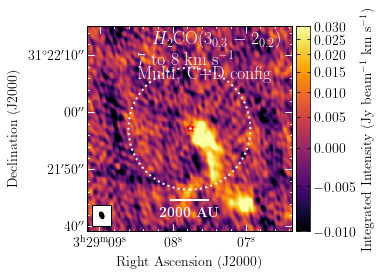

In [3]:
saveaction = 0
contourplot = 0
regionplot = 0

folder = 'H2CO/CDconfig/'
filename = H2CO_303_202
cleanalg = 'Multi, C+D config'
stretch = 'arcsinh'
moment = 0
velinit = 7 #km/s
velend = 8 #km/s
savefile = folder + 'H2CO_'+cleanalg+'_'+str(velinit)+'to'+str(velend)+'_'+stretch+'_moment'+str(moment)+'.pdf'
vmin = -0.01
vmax = 0.03
vmid = 0.001
cmap = 'inferno'
radiusplot = 18/3600
title = r'$H_{2}$CO($3_{0,3}-2_{0,2}$)\\'+str(velinit)+' to '+str(velend)+r' km s$^{-1}$\\'+cleanalg

contourfile = 'SO_55_44/Per-emb-50_C_l009l048_cont.fits'
contourfile2 = filename+'.fits'
contlevels = [0.007]
regions = folder +'spectra_regs.reg'

cube = SpectralCube.read(filename+'.fits')
cube = cube.with_spectral_unit(u.km/u.s)
headercube = cube.hdu.header
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]

subcube = cube.spectral_slab(velinit*u.km/u.s, velend*u.km/u.s)
moment = subcube.moment(order=moment).hdu
rms = calculatenoise(moment.data)[0]
if contourplot:
    contourfile = SpectralCube.read(contourfile)
    contourfile = contourfile[0,:,:]
    contourfile2 = SpectralCube.read(contourfile2).with_spectral_unit(u.km/u.s)
    contour2 = contourfile2.spectral_slab(velinit*u.km/u.s, velend*u.km/u.s).moment(order=moment).hdu
    rms2 = calculatenoise(contour2.data)[0]


fig = plot_aplpy_standard(moment, stretch, vmin, vmax, cmap, vmid=vmid)
fig.recenter(phasecent[0], phasecent[1], radiusplot)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (Jy beam$^{-1}$ km s$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
if contourplot:
    fig.show_contour(contour2, levels=[rms2*3, rms2*5], colors='w')
if regionplot:
    fig.show_regions(regions)
fig.add_label(0.95,0.85, title, color='white',
               relative=True, horizontalalignment='right', size=18)
fig.scalebar.set_label(r'\textbf{2000 AU}')

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)


### Gaussian Fit result plots

#### H2CO fit results

#### Velocity and sigma together with integrated intensity

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.
Spacing is not a multiple of base spacing - resetting spacing to match format
You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.
Spacing is not a multiple of base spacing - resetting spacing to match format


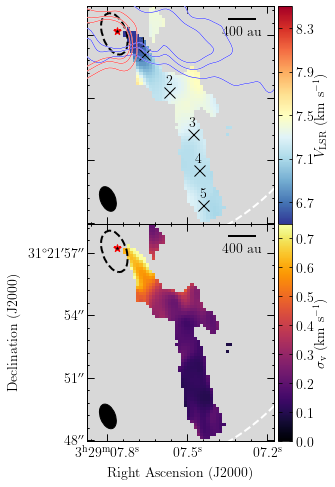

In [55]:
saveaction = 0

folder = 'figures/'
filename = H2CO_303_202_fitparams
savefile = folder + 'H2CO_fitresults_v_sigmav_withregs.pdf'
stretch = 'linear'
cmap = ['RdYlBu_r', 'inferno']
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']

filename_continuum = continuum_selfcal
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()
filename_regions = 'figures/spectra_regs_H2CO.reg'

levelblue = levelred =[8, 16, 24]
contourbluedata = fits.getdata(CO21blue+'.fits')
contourbluehead = fits.getheader(CO21blue+'.fits')
contourreddata = fits.getdata(CO21red+'.fits')
contourredhead = fits.getheader(CO21red+'.fits')

vmin = [6.5, 0.]
vmax = [8.5, 0.75]
ang_size = (400 / 293) * u.arcsec
colorbarlabel = ['Peak intensity (K)', r'$V_{\mathrm{LSR}}$ (km s$^{-1}$)', r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)']

fig = plt.figure(figsize=(4,8))
for i in range(1,3):
    component1 = fits.PrimaryHDU(data=paramcube[i],header=header)
    gc1 = plot_aplpy_subfig(component1, fig, (2,1,i), stretch, vmin[i-1], vmax[i-1], cmap[i-1], label_col='k', star_col='r')
    gc1.set_nan_color(np.array([1,1,1])*0.85)
    gc1.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
    gc1.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls='--', color='w', lw=2)
    gc1.scalebar.set_corner('top right')
    gc1.scalebar.set_length(ang_size)
    gc1.scalebar.set_label('400 au')
    gc1.colorbar.set_axis_label_text(colorbarlabel[i])
    gc1.colorbar.set_axis_label_pad(0.0)
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    gc1.beam.set_frame(False)
    gc1.recenter(52.2813459,31.3647663, width=0.0025, height=0.0029)
    gc1.ticks.set_xspacing(1.5*7.407e-4)
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    
    if i==1:
        gc1.tick_labels.hide()
        gc1.axis_labels.hide()
        gc1.colorbar.set_ticks([6.7,7.1,7.5,7.9,8.3])
        gc1.show_regions(filename_regions)
        gc1.show_contour(fits.PrimaryHDU(contourbluedata, contourbluehead), levels=levelblue, colors='b', linewidths = 0.5, zorder=21)
        gc1.show_contour(fits.PrimaryHDU(contourreddata, contourredhead), levels=levelred, colors='r', linewidths = 0.5, zorder=21)
        gc1.show_contour(fits.PrimaryHDU(contourbluedata, contourbluehead), levels=levelblue, colors='w', linewidths = 1, zorder=11)
        gc1.show_contour(fits.PrimaryHDU(contourreddata, contourredhead), levels=levelred, colors='w', linewidths = 1, zorder=11)
    if i==2:
        gc1.colorbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
fig.subplots_adjust(hspace=0.)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

### H2CO zoom into gradient with H2CO contours

/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
  cm.set_bad(color)
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


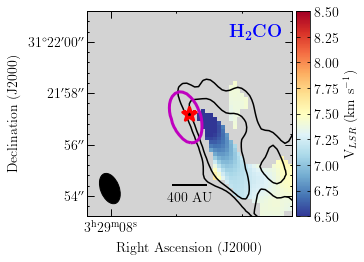

In [10]:
saveaction = 1

filename = H2CO_303_202_s + '_1G_fitparams'
stretch = 'linear'
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
moment = paramcube[1]
vmin = 6.5
vmax = 8.5
cmap = 'RdYlBu_r'

ang_size = (400 / 293) * u.arcsec
title = r'\textbf{H\boldmath$_{2}$CO}'
filename_contour = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube_stream_mom0'
levels = np.array([3,5]) * 0.25 # K km/s

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.set_nan_color('lightgrey')
fig.colorbar.set_axis_label_text(r'V$_{LSR}$ (km s$^{-1}$)')
fig.show_contour(filename_contour+'.fits', levels=levels, colors='k')
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 AU')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='m', linewidths=3)
fig.recenter(ra_Per50.value, dec_Per50.value, (4*u.arcsec).to(u.deg).value)
fig._layers['star']._sizes = np.array([200])
fig._layers['star']._linewidths = np.array([3.])
fig.beam.set_frame(False)
fig.add_label(0.95,0.9, title, color='b',
               relative=True, horizontalalignment='right', size=18)
if saveaction:
    savefile = filename + '_v_lsr_H2CO_cont.pdf'
    plt.savefig(savefile, bbox_inches='tight', dpi=300)
  


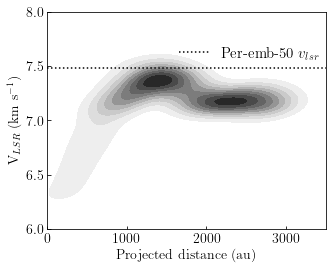

In [65]:
# Plot the velocity plane of the fitted values
saveaction = 1
filename = H2CO_303_202_fit_Vc
savefile = filename + '_vel_kde.pdf'
regionfile = 'data/region_streamer_l_kink.reg'
r_proj, v_los = per_emb_50_get_vc_r(filename+'.fits', regionfile)

# create the grid for the kernel distribution
xmin = 0
xmax = 3500
ymin = 6.
ymax = 8.
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
#
gd_vlos = np.isfinite(r_proj*v_los)  # filter nan
values = np.vstack([r_proj[gd_vlos].value, v_los[gd_vlos].value])

kernel = stats.gaussian_kde(values)
zz = np.reshape(kernel(positions).T, xx.shape)
zz /= zz.max()  # normalization of probability

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.set_xlabel('Projected distance (au)')
ax.set_ylabel(r"V$_{LSR}$ (km s$^{-1}$)")
ax.contourf(xx, yy, zz, cmap='Greys', levels=np.arange(0.1, 1.2, 0.1), vmin=0., vmax=1.1)
ax.set_ylim([6,8])
ax.set_xlim([0, 3500])
ax.axhline(v_lsr.value, color='k', label=r'Per-emb-50 $v_{lsr}$', ls=':')
ax.legend(loc=(0.45, 0.75), frameon=False, fontsize=15)
if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

H2Co pretty

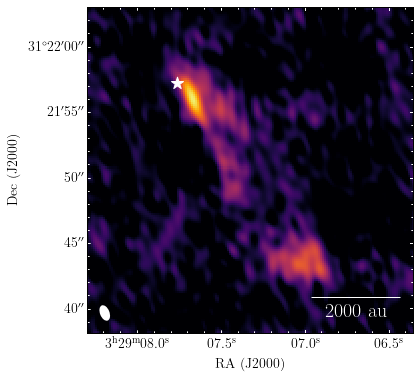

In [3]:
saveaction = 1
folder = 'H2CO/CDconfig/'
filename = H2CO_303_202_TdV_s
stretch = 'arcsinh'
header = fits.getheader(filename+'.fits')
freq = header['RESTFREQ'] * u.Hz
phasecent = [header['ra'], header['dec']]
savefile = folder + 'H2CO_moment0_pretty.pdf'
cmap = 'inferno'

vmin = 0
vmax = 5
vmid = 1

gc = aplpy.FITSFigure(filename + '.fits', figsize=(6,6))
gc.show_colorscale(stretch=stretch, cmap=cmap, vmin=vmin, vmax=vmax, vmid=vmid) 
gc.add_beam()
gc.beam.set_frame(False)
gc.beam.set_facecolor('w')
# fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='k', lw=2)
# fig.add_label(0.05,0.92, r'H$_{2}$CO', color='k',
#                relative=True, horizontalalignment='left', size=13)

# fig.colorbar.set_axis_label_text('Integrated Intensity (K km s$^{-1}$)')
gc.show_markers(ra_Per50.value, dec_Per50.value, marker='*', s=160, layer='star',
                       edgecolor='w', facecolor='w', zorder=31)
distance = 293.
ang_size = (2000 / distance) * u.arcsec
gc.add_scalebar(ang_size, label='2000 au', color='w', corner='bottom right')
gc.scalebar.set_font(family='monospace', size=20)
if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

### Streamline model plots

In [3]:
# Load the streamline results
modelname = 'H2CO_0.18Msun_env'
pickle_in = open('analysis/streamer_model_'+modelname+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
ra = streamdict['ra']
dec = streamdict['dec']
dsky = streamdict['d_sky_au']
vel = streamdict['vlsr']
pickle_in = open('analysis/streamer_model_'+modelname+'_params.pickle', "rb")
paramsdict = pickle.load(pickle_in)
omega0 = paramsdict['omega0']
r0 = paramsdict['r0']
v_lsr = paramsdict['v_lsr']

regionfile = 'data/region_streamer_l.reg'

# Load source params
M_s = 1.71*u.Msun # was 2.9
M_env = 0.18*u.Msun # was 2.2
# M_env = 2.2*u.Msun
M_disk = 0.58*u.Msun
Mstar = (M_s+M_env+M_disk)
r_c = SL.r_cent(Mstar, omega0, r0)
print(paramsdict)


{'theta0': <Quantity 61.5 deg>, 'r0': <Quantity 3330. AU>, 'phi0': <Quantity 28. deg>, 'v_r0': <Quantity 1.25 km / s>, 'omega0': <Quantity 4.53e-13 1 / s>, 'v_lsr': <Quantity 7.48 km / s>, 'inc': <Quantity -23. deg>, 'PA': <Quantity 260. deg>}


In [4]:
modelname = 'H2CO_0.18Msun_env'
pickle_in = open('analysis/streamer_model_'+modelname+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
dsky = streamdict['d_sky_au']
vel1 = streamdict['vlsr']

modelname = 'H2CO_0.39Msun_env'
pickle_in = open('analysis/streamer_model_'+modelname+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
vel2 = streamdict['vlsr']

diff = vel1-vel2[:308]
print(np.amax(diff))

0.046575058922994295 km / s


In [11]:
(x1, y1, z1), (vx1, vy1, vz1) = SL.xyz_stream(
    mass=Mstar, r0=r0, theta0=paramsdict['theta0'], phi0=paramsdict['phi0'], omega=omega0, v_r0=paramsdict['v_r0'], inc=paramsdict['inc'], pa=paramsdict['PA'])

deltay = y1[1:]-y1[:len(y1)-1]
deltax = x1[1:]-x1[:len(x1)-1]
print(np.arctan(deltay/deltax).to(u.deg))

rc=257.71576551354735 AU
[ 4.55042248  2.00546337 18.0658085  -1.30479181 15.1444891  13.92960976
  9.81541583 -3.83880625 19.44473641  6.69166779 12.30828645  6.16938941
 12.86445311  9.67544939  9.68625535  9.72805012  9.7284578   9.79314433
  9.76619374  9.82159247  9.84504383  9.87935538  9.8715551   9.9161738
  9.94679979  9.94579762  9.99800857 10.00848149 10.01905069 10.05583286
 10.08421594 10.12013676 10.13355015 10.15107609 10.1890371  10.20830956
 10.2279072  10.2596841  10.28046509 10.30985191 10.3382839  10.37001629
 10.39265703 10.40834942 10.44066301 10.46938656 10.50391766 10.52508518
 10.55007641 10.5717428  10.60499771 10.64013039 10.65360115 10.6954911
 10.71620574 10.73847391 10.77187959 10.8049756  10.8346158  10.85653567
 10.88672995 10.9160137  10.95196199 10.97152764 11.00577178 11.03882251
 11.06190459 11.09967346 11.12205578 11.15908218 11.18380784 11.21683324
 11.25106489 11.27829272 11.31316965 11.34200362 11.37728512 11.40733434
 11.4362457  11.47100753 11.

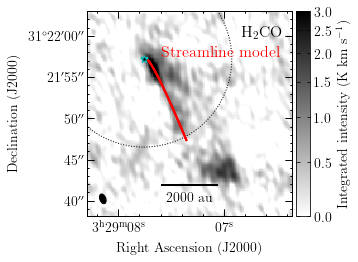

In [10]:
saveplot = 0

# Plot the image plane
filename = H2CO_303_202_TdV_s
stretch = 'arcsinh'
header = fits.getheader(filename+'.fits')
freq = header['RESTFREQ'] * u.Hz
phasecent = [header['ra'], header['dec']]
vmin = 0
vmax = 3
vmid = 1
cmap='gray_r'
fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='k', star_col='c', vmid=vmid)
fig.show_circles(ra_Per50, dec_Per50, pb_noema(freq).to(u.deg)*0.5,
                  ls=':', color='black')
fig.colorbar.set_axis_label_text(r'Integrated intensity (K km s$^{-1}$)')
fig.show_markers(ra, dec, marker='o', color='red', s=1)
fig.add_label(0.85, 0.9, r'H$_2$CO', relative=True, size=16, weight='bold')
fig.add_label(0.65, 0.8, r'Streamline model', relative=True, size=16, color='r', weight='bold')
if saveplot:
  fig.savefig('analysis/streamline_image_peremb50_'+modelname+'.pdf', dpi=300)

#### Comparison between the two envelope masses with the same parameters

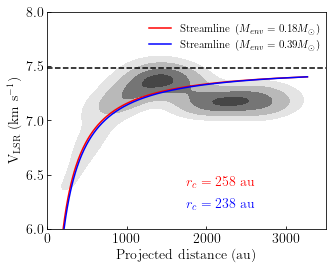

In [72]:
saveplot = 0
regionfile = 'data/region_streamer_l_kink.reg'
r_proj, v_los = per_emb_50_get_vc_r(H2CO_303_202_fit_Vc+'.fits', regionfile)

# create the grid for the kernel distribution
xmin = 0
xmax = 3500
ymin = 6.
ymax = 8.
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
gd_vlos = np.isfinite(r_proj*v_los)  # filter nan
values = np.vstack([r_proj[gd_vlos].value, v_los[gd_vlos].value])

kernel = stats.gaussian_kde(values)
zz = np.reshape(kernel(positions).T, xx.shape)
zz /= zz.max()  # normalization of probability
levelskde = np.append(np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)[::-1], [1.0]) # .5 sigma steps, for sigma of a bivariate normal dist

# plot for kde
fig2 = plt.figure(figsize=(5, 4))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('Projected distance (au)')
ax2.set_ylabel(r"V$_{\mathrm{LSR}}$ (km s$^{-1}$)")
# ax2.contourf(xx, yy, zz, cmap='Greys', levels=np.arange(0.1, 1.2, 0.2), vmin=0., vmax=1.2)
ax2.contourf(xx, yy, zz, cmap='Greys', levels=levelskde, vmin=0., vmax=1.2)
ax2.set_ylim([6,8])
ax2.set_xlim([0, 3500])

#Plot for image
filename = H2CO_303_202_TdV_s
stretch = 'arcsinh'
header = fits.getheader(filename+'.fits')
freq = header['RESTFREQ'] * u.Hz
phasecent = [header['ra'], header['dec']]
vmin = 0
vmax = 3
vmid = 0.5
cmap='gray_r'

# Load the streamline results
modelname1 = 'H2CO_0.18Msun_env'
modelname2 = 'H2CO_0.39Msun_env'
pickle_in = open('analysis/streamer_model_'+modelname1+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
ra1 = streamdict['ra']
dec1 = streamdict['dec']
dsky1 = streamdict['d_sky_au']
vel1 = streamdict['vlsr']
pickle_in = open('analysis/streamer_model_'+modelname1+'_params.pickle', "rb")
paramsdict = pickle.load(pickle_in)
omega01 = paramsdict['omega0']
r01 = paramsdict['r0']
pickle_in = open('analysis/streamer_model_'+modelname2+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
ra2 = streamdict['ra']
dec2 = streamdict['dec']
dsky2 = streamdict['d_sky_au']
vel2 = streamdict['vlsr']
pickle_in = open('analysis/streamer_model_'+modelname2+'_params.pickle', "rb")
paramsdict = pickle.load(pickle_in)
omega02 = paramsdict['omega0']
r02 = paramsdict['r0']

v_lsr = paramsdict['v_lsr']

# Load source params
M_s = 1.71*u.Msun # was 2.9
M_env1 = 0.18*u.Msun
M_env2 = 0.39*u.Msun
M_disk = 0.58*u.Msun
Mstar1 = (M_s+M_env1+M_disk)
Mstar2 = (M_s+M_env2+M_disk)
r_c1 = SL.r_cent(Mstar1, omega01, r01)
r_c2 = SL.r_cent(Mstar2, omega02, r02)

# Add the models and labels in the kde
# label=r'Per-emb-50 $v_{lsr}$', 
ax2.axhline(v_lsr.value, color='k', ls='--')
ax2.plot(dsky1, vel1, color='red', label=r'Streamline ($M_{env}=0.18M_{\odot}$)')
ax2.annotate(r'$r_c = {}$ au'.format(int(np.round(r_c1.value,0))), (0.5, 0.2), xycoords='axes fraction', size=14, color='r')
ax2.plot(dsky2, vel2, color='blue', label=r'Streamline ($M_{env}=0.39M_{\odot}$)')
ax2.annotate(r'$r_c = {}$ au'.format(int(np.round(r_c2.value,0))), (0.5, 0.1), xycoords='axes fraction', size=14, color='b')
ax2.legend(loc=(0.35, 0.80), frameon=False, fontsize=11)
# ax2.annotate(r'Per-emb-50 $v_{lsr}$', (0.02, 0.76), xycoords='axes fraction', size=10, color='k')

if saveplot:
  fig2.savefig('figures/streamline_comparison_Menv_vlsr_r_kde_peremb50.pdf', dpi=300, bbox_inches='tight')




#### Velocity gradient with fit region and streamline model

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.
Spacing is not a multiple of base spacing - resetting spacing to match format


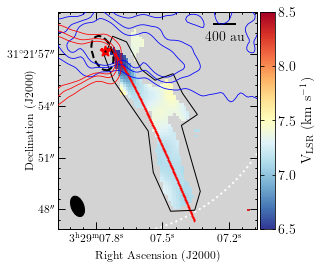

In [71]:
saveaction = 1

# model
modelname = 'H2CO_0.18Msun_env'
pickle_in = open('analysis/streamer_model_'+modelname+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
ra1 = streamdict['ra']
dec1 = streamdict['dec']

folder = 'figures/'
filename = H2CO_303_202_fitparams
savefile = folder + 'H2CO_fitresults_v_lsr_cont_withstream_woutflow.pdf'
stretch = 'linear'
vmin = 6.5
vmax = 8.5
cmap = 'RdYlBu_r'
regionfile = 'data/region_streamer_l_kink.reg'

levelblue = levelred =[8, 16, 24]
contourbluedata = fits.getdata(CO21blue+'.fits')
contourbluehead = fits.getheader(CO21blue+'.fits')
contourreddata = fits.getdata(CO21red+'.fits')
contourredhead = fits.getheader(CO21red+'.fits')

paramcube = fits.getdata(filename+'.fits')
moment = paramcube[1]
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
title = r'\textbf{H\boldmath$_{2}$CO}'

ang_size = (400 / 293) * u.arcsec
filename_contour = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube_stream_mom0'
levels = np.array([3,5]) * 0.25 # K km/s

filename_continuum = continuum_selfcal
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(fits.PrimaryHDU(data=moment, header=header), stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.set_nan_color('lightgrey')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
fig.colorbar.set_ticks([6.5, 7, 7.5, 8, 8.5])
fig.colorbar.set_axis_label_text(r'V$_{\mathrm{LSR}}$ (km s$^{-1}$)')
fig.scalebar.set_corner('top right')
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 au')
# fig.recenter(52.2814707, 31.3648160,(6*u.arcsec).to(u.deg).value)
fig.recenter(52.2813459, 31.3647663, width=0.0032, height=0.0035)
fig._layers['star']._sizes = np.array([100])
fig._layers['star']._linewidths = np.array([2.])
fig.beam.set_frame(False)
# fig.add_label(0.95,0.9, title, color='k', relative=True, horizontalalignment='right', size=18)
fig.ticks.set_xspacing(1.5*7.407e-4)
fig.tick_labels.set_xformat('hh:mm:ss.s')

fig.show_contour(fits.PrimaryHDU(contourbluedata, contourbluehead), levels=levelblue, colors='b', linewidths = 0.8, zorder=21)
fig.show_contour(fits.PrimaryHDU(contourreddata, contourredhead), levels=levelred, colors='r', linewidths = 0.8, zorder=21)

fig.axis_labels.set_ypad(-2.0)
fig.show_regions(regionfile)
fig.show_markers(ra1, dec1, marker='o', c='red', s=0.5)
fig.axis_labels.set_font(size='small')
fig.tick_labels.set_font(size='small')
if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

## C18O plots

### Moment 0 map

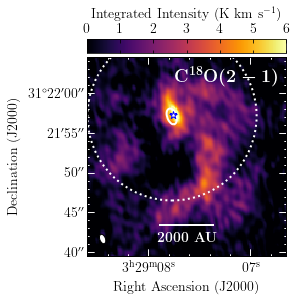

In [26]:
saveaction = 1 


folder = 'figures/'
filename = C18O_2_1_TdV 
cleanalg = 'Multi'
stretch = 'linear'

savefile = folder + 'C18O_'+cleanalg+'_fitcube_total_mom0_labeled_continuum_' + stretch + '.pdf'
vmin = 0
vmax = 6
vmid = 0.5
cmap = 'inferno'
title = r'\textbf{C\boldmath$^{18}$O($2-1$)}'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()
levels=[0.007]

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.add_label(0.97,0.9, title, color='w',
               relative=True, horizontalalignment='right', size=18)
# fig.add_label(0.95,0.80, cleanalg, color='k',
#                relative=True, horizontalalignment='right', size=18)
fig.scalebar.set_label(r'\textbf{2000 AU}')
fig.show_contour(fits.PrimaryHDU(cont_data, cont_header), levels=levels, colors='w', linewidths=2)
fig.beam.set_frame(False)
fig.beam.set_facecolor('w')
fig.recenter(52.2817730,31.3644484, 0.0034800)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

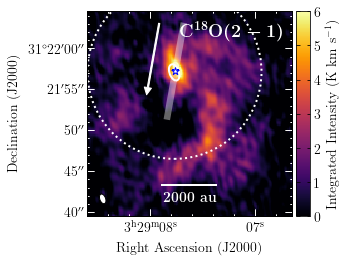

In [37]:
# same as before but with the colorbar on the side
saveaction = 1

folder = 'figures/'
filename = C18O_2_1_TdV 
cleanalg = 'Multi'
stretch = 'linear'

savefile = folder + 'C18O_'+cleanalg+'_fitcube_total_mom0_labeled_continuum_' + stretch + '_colorbarright_wpv.pdf'
vmin = 0
vmax = 6
vmid = 0.5
cmap = 'inferno'
title = r'\textbf{C\boldmath$^{18}$O($2-1$)}'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]
wcs=WCS(headercube).celestial
#for the pv bar
g_cent = SkyCoord(ra_Per50, dec_Per50)
length = 12 * u.arcsec
pa_angle_cent = 170 * u.deg
path_cent = PathFromCenter(center=g_cent, length=length, angle=pa_angle_cent, width=1*u.arcsec)
vortices = np.array([[[path_cent._coords[0].ra.value, path_cent._coords[1].ra.value],[path_cent._coords[0].dec.value, path_cent._coords[1].dec.value]]])
patch_width = (1 * u.arcsec / (headercube['CDELT2']*u.deg).to(u.arcsec)).value
x_arrow = path_cent._coords[0].ra.value + 0.001
y_arrow = path_cent._coords[0].dec.value
dx_arrow = 0.0005
dy_arrow = (path_cent._coords[1].dec.value - path_cent._coords[0].dec.value)/(path_cent._coords[1].ra.value - path_cent._coords[0].ra.value) * dx_arrow
filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()
levels=[0.007]

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.add_label(0.97,0.9, title, color='w',
               relative=True, horizontalalignment='right', size=18)
# fig.add_label(0.95,0.80, cleanalg, color='k',
#                relative=True, horizontalalignment='right', size=18)
fig.scalebar.set_label(r'\textbf{2000 au}')
fig.show_contour(fits.PrimaryHDU(cont_data, cont_header), levels=levels, colors='w', linewidths=2)
fig.beam.set_frame(False)
fig.beam.set_facecolor('w')
fig.recenter(52.2817730,31.3644484, 0.0034800)
fig.show_lines(vortices, color='w', linewidth=patch_width, alpha=0.4)
fig.show_arrows(x_arrow, y_arrow, dx_arrow, dy_arrow, width=1, color='w')

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

#### C18O Position-velocity diagram

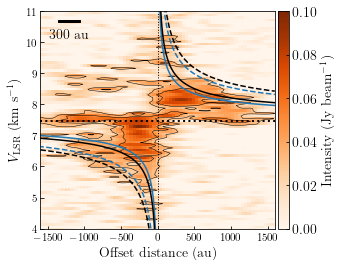

In [11]:
saveaction = 1

pvfile = C18O_2_1_PV
savefile = 'figures/PVdiagram_C18O_pvline_center_Per50_1arcsec_170PA_12arcsec_orange.pdf'
v_lsr = 7.48*u.km/u.s  # +- 0.14 km/s according to out C18O data
arcsectoau = 293  # * u.au / u.arcsec
pvdata = fits.getdata(pvfile+'.fits')
pvheader = fits.getheader(pvfile+'.fits')
rms = 0.01
# contourlevels = np.array([3,5,15,25]) * rms
contourlevels = np.array([3,5]) * rms
vmin = 0
vmax = 0.1

delta0 = pvheader['CRVAL1']
delta_delta = pvheader['CDELT1']
delta_pix0 = pvheader['CRPIX1']
delta_npix = pvheader['NAXIS1']
vel0 = pvheader['CRVAL2']
delta_vel = pvheader['CDELT2']
vel_pix0 = pvheader['CRPIX2']
vel_npix = pvheader['NAXIS2']

delta_array = np.array([delta0 + delta_delta*(i-delta_pix0) for i in range(delta_npix)]) * u.deg
vel_array = np.array([vel0 + delta_vel * (i - vel_pix0) for i in range(vel_npix)]) * u.m/u.s

# transformation to general coordinates
vel_array = vel_array.to(u.km/u.s)
mid_delta = delta_array[int(len(delta_array)/2+2-1)]
offset_array = (delta_array - mid_delta).to(u.arcsec)
distance_array = offset_array.value * arcsectoau * u.au

offset, vel = np.meshgrid(distance_array, vel_array)


fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
norm = simple_norm(pvdata, 'linear', min_cut=vmin,max_cut=vmax)
pcolor = ax.pcolor(offset.value, vel.value, pvdata, shading='auto', norm=norm,  cmap='Oranges', rasterized=True) #cmap='Blues')
contours = ax.contour(offset.value, vel.value, pvdata, contourlevels, colors='k', linewidths=0.5)
fig.colorbar(pcolor, ax=ax, label=r'Intensity (Jy beam$^{-1}$)', pad=0.01)
# Now we plot a kepler rotation over it
mstar = [0.5, 0.7, 1.5, 1.9] * u.Msun
inclination = 67 # 0 is face on
# colors = ['red', 'orange', 'red', 'orange']
# colors = ['#cc3311', '#ee7733', '#cc3311', '#ee7733']
colors = ['C0','k', 'C0', 'k']
linestyles = ['-', '-', '--', '--']
radius = np.linspace(1, 1600, 1000) * u.au
radius_neg = np.linspace(-1, -1600, 1000) * u.au
for mass, color, ls in zip(mstar, colors,  linestyles):
    # velocity = v_kepler(mass, radius).to(u.km/u.s) + v_lsr
    velocity = v_kepler(mass, radius).to(u.km/u.s) * np.sin(inclination*np.pi/180)
    velocity_pos = velocity + v_lsr
    velocity_neg = -1*velocity + v_lsr
    ax.plot(radius, velocity_pos, ls=ls, color=color,
            label=r'$M_{\star}='+str(mass.value)+r'M_{\odot}$')
    ax.plot(radius_neg, velocity_neg, ls=ls, color=color)
    
ax.axhline(v_lsr.value, color='k', linestyle=':', linewidth=2)
ax.axvline(0, color='k', linestyle=':', linewidth=1)
ax.set_ylim([4, 11])
ax.set_ylabel(r'$V_{\mathrm{LSR}}$ (km s$^{-1}$)')
ax.set_xlim([-1600, 1600])
ax.set_xlabel('Offset distance (au)')
# ax.legend(fontsize=8, loc=4)
# ax.annotate(r'rms = 0.01 Jy beam$^{-1}$', (0.05, 0.05), xycoords='axes fraction', color='k', size=8)
# ax.annotate(r'i = 67$^{\circ}$', (0.05, 0.01), xycoords='axes fraction', color='k', size=10)
# ax.annotate(r'\textbf{N}', (0.05, 0.1), xycoords='axes fraction', color='k', size=16)
# ax.annotate(r'\textbf{S}', (0.90, 0.1), xycoords='axes fraction', color='k', size=16)
ax.set_xticks([-1500, -1000, -500, 0, 500, 1000, 1500])
ax.tick_params(labelsize=11)

bar = AnchoredSizeBar(ax.transData, 300, '300 au', 2, pad=0.1, borderpad=0.5, sep=5,  frameon=False, color='k', size_vertical=0.08)
ax.add_artist(bar)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

### C18O with H2CO overlaid

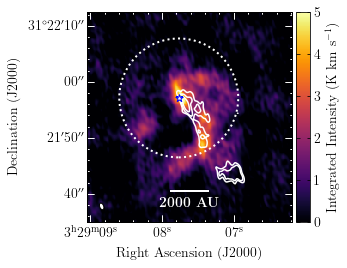

In [16]:
saveaction = 1

folder = 'C18O/CDconfig/'
filename = C18O_2_1_TdV 
filename_contour = H2CO_303_202_TdV_s
cleanalg = 'Multi'
stretch = 'linear'

savefile = folder + 'C18O_'+cleanalg+'_fitcube_total_mom0' + '_'+stretch + '_H2COcontour_nolabels.pdf'
vmin = 0
vmax = 5
vmid = 0.5
cmap = 'inferno'
title = r'\textbf{C\boldmath$^{18}$O($2-1$)}'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
# fig.add_label(0.95,0.9, title, color='y',
#                relative=True, horizontalalignment='right', size=14)
fig.scalebar.set_label(r'\textbf{2000 AU}')

rms, __ = calculatenoise(fits.getdata(filename_contour+'.fits'))
levels = rms * np.array([3, 5, 10])
fig.show_contour(filename_contour+'.fits', colors='w', levels=levels)
# fig.add_label(0.95,0.8, r'\textbf{H\boldmath$_{2}$CO($3_{0,3}-2_{0,2}$)}', color='w',
#                relative=True, horizontalalignment='right', size=14)
fig.beam.set_frame(False)
fig.beam.set_facecolor('w')
if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)


### Fit results

/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
  cm.set_bad(color)
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap

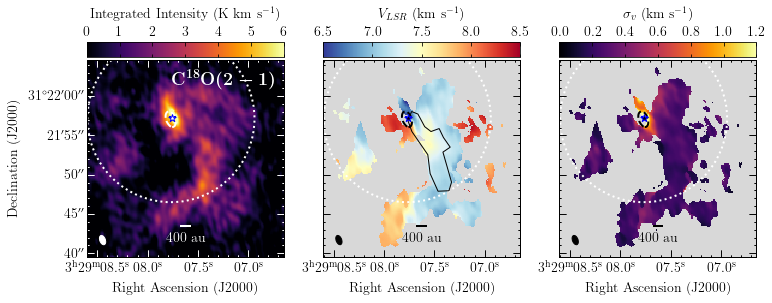

In [39]:
saveaction = 1

filename = C18O_2_1_fitparams
folder = 'figures/'
savefile = folder + 'C18O_fitresults_v_sigmav.pdf'
stretch = 'linear'
cmap = ['RdYlBu_r', 'inferno']
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
regionfile = 'data/region_streamer_l_kink.reg'

filename_continuum = continuum_selfcal
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

vmin = [6.5, 0.]
vmax = [8.5, 1.2]
ang_size = (400 / 293) * u.arcsec
colorbarlabel = ['Peak intensity (K)', r'$V_{LSR}$ (km s$^{-1}$)', r'$\sigma_v$ (km s$^{-1}$)']

fig = plt.figure(figsize=(12,5))
# C18O_2_1_TdV
title = r'\textbf{C\boldmath$^{18}$O($2-1$)}'
gc0 = plot_aplpy_subfig(C18O_2_1_TdV+'.fits', fig, (1,3,1), stretch, 0, 6, 'inferno', label_col='w', star_col='b')
gc0.colorbar.set_location('top')
gc0.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
gc0.scalebar.set_length(ang_size)
gc0.scalebar.set_label('400 au')
gc0.colorbar.set_axis_label_pad(8)
gc0.beam.set_frame(False)
gc0.beam.set_color('w')
gc0.recenter(52.2817730,31.3644484, 0.0034800)
gc0.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
gc0.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='w', linestyles='dashed', linewidths=2)
gc0.add_label(0.97,0.9, title, color='w',
               relative=True, horizontalalignment='right', size=18)
gc0.tick_labels.set_xformat('hh:mm:ss.s')
for i in range(1,3):
  component1 = fits.PrimaryHDU(data=paramcube[i],header=header)
  gc1 = plot_aplpy_subfig(component1, fig, (1,3,i+1), stretch, vmin[i-1], vmax[i-1], cmap[i-1], label_col='k', star_col='b')
  gc1.colorbar.set_location('top')
  gc1.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
  gc1.set_nan_color(np.array([1,1,1])*0.85)
  gc1.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
  gc1.scalebar.set_length(ang_size)
  gc1.scalebar.set_label('400 au')
  gc1.colorbar.set_axis_label_text(colorbarlabel[i])
  gc1.colorbar.set_axis_label_pad(8)
  gc1.beam.set_frame(False)
  gc1.recenter(52.2817730,31.3644484, 0.0034800)
  gc1.tick_labels.set_xformat('hh:mm:ss.s')
  if i:
    gc1.tick_labels.hide_y()
    gc1.axis_labels.hide_y()
  if i==1:
    gc1.colorbar.set_ticks([6.5, 7,7.5,8,8.5])
    gc1.show_regions(regionfile)
# fig.subplots_adjust(wspace=0.0)
    
if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.
You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
Text labels do not have attribute linewidth. Skipping.
Text labels do not have attribute linewidth. Skipping.


<Figure size 864x360 with 0 Axes>

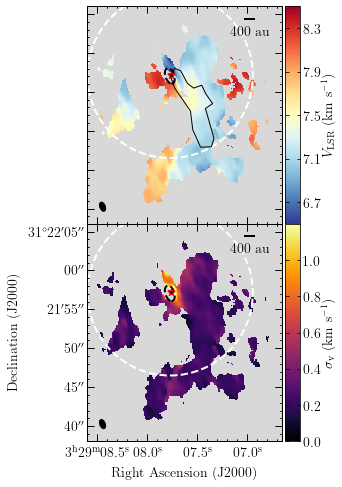

In [7]:
saveaction = 1

filename = C18O_2_1_fitparams
folder = 'figures/'
savefile = folder + 'C18O_fitresults_v_sigmav_vertical.pdf'
stretch = 'linear'
cmap = ['RdYlBu_r', 'inferno']
paramcube = fits.getdata(filename+'.fits')
head = fits.getheader(filename+'.fits')
phasecent = np.array([head['ra'], head['dec']]) *u.deg
freq = head['restfreq'] * u.Hz
header = WCS(head).celestial.to_header()
header['bmaj'] = head['bmaj']
header['bmin'] = head['bmin']
header['bpa'] = head['bpa']
regionfile = 'data/region_streamer_l_kink.reg'

filename_continuum = continuum_selfcal
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

vmin = [6.5, 0.]
vmax = [8.5, 1.2]
ang_size = (400 / 293) * u.arcsec
colorbarlabel = [r'$V_{\mathrm{LSR}}$ (km s$^{-1}$)', r'$\sigma_{\mathrm{v}}$ (km s$^{-1}$)']

fig = plt.figure(figsize=(12,5))
# C18O_2_1_TdV
title = r'\textbf{C\boldmath$^{18}$O($2-1$)}'
# gc.tick_labels.set_xformat('hh:mm:ss.s')
  
fig = plt.figure(figsize=(4,8))
for i in range(1,3):
    component1 = fits.PrimaryHDU(data=paramcube[i],header=header)
    gc1 = plot_aplpy_subfig(component1, fig, (2,1,i), stretch, vmin[i-1], vmax[i-1], cmap[i-1], label_col='k', star_col='r')
    gc1.set_nan_color(np.array([1,1,1])*0.85)
    gc1.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='k', linestyles='dashed', linewidths=2)
    gc1.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls='--', color='w', lw=2)
    gc1.scalebar.set_corner('top right')
    gc1.scalebar.set_length(ang_size)
    gc1.scalebar.set_label('400 au')
    gc1.colorbar.set_axis_label_text(colorbarlabel[i-1])
    gc1.colorbar.set_axis_label_pad(0.0)
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    gc1.beam.set_frame(False)
#     gc1.recenter(52.2817730,31.3644484, 0.0034800)
    gc1.recenter(52.2817730,31.3644484, width=0.0034800*2, height=0.0038800*2)
#     gc1.ticks.set_xspacing(1.8*7.407e-4)
    gc1.tick_labels.set_xformat('hh:mm:ss.s')
    
    if i==1:
        gc1.tick_labels.hide()
        gc1.axis_labels.hide()
        gc1.colorbar.set_ticks([6.7,7.1,7.5,7.9,8.3])
        gc1.show_regions(regionfile)
    if i==2:
        gc1.colorbar.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
fig.subplots_adjust(hspace=0)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

### Streamline model results

/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
  cm.set_bad(color)
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


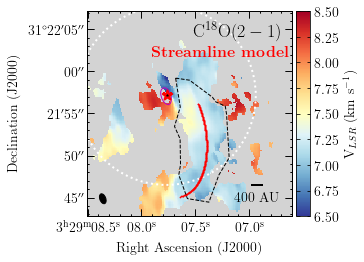

In [8]:
saveaction = 1

modelname = 'C18O_0.18Msun_env'
pickle_in = open('analysis/streamer_model_'+modelname+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
ra1 = streamdict['ra']
dec1 = streamdict['dec']
dsky = streamdict['d_sky_au']
vel = streamdict['vlsr']
regionfile = 'data/region_streamer_C18O_final.reg'

# Load source params
M_s = 1.71*u.Msun # was 2.9
M_env = 0.18*u.Msun # was 2.2
M_disk = 0.58*u.Msun
Mstar = (M_s+M_env+M_disk)

filename = C18O_2_1_fit_Vc
stretch = 'linear'
vmin = 6.5
vmax = 8.5
cmap = 'RdYlBu_r'
header = fits.getheader(filename+'.fits')
freq = header['RESTFREQ'] * u.Hz
phasecent = [header['ra'], header['dec']]
title = r'C$^{18}$O($2-1$)'

ang_size = (400 / 293) * u.arcsec
centra = 52.2814760
centdec = 31.3652689
radiusplot = 0.0033887 * u.deg

filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='k', star_col='r')
fig.set_nan_color('lightgrey')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.colorbar.set_axis_label_text(r'V$_{LSR}$ (km s$^{-1}$)')
fig.scalebar.set_corner('bottom right')
fig.scalebar.set_length(ang_size)
# fig.scalebar.set_corner('bottom center')
fig.scalebar.set_label('400 AU')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='m', linewidths=1)
# fig.recenter(ra_Per50.value, dec_Per50.value, (6*u.arcsec).to(u.deg).value)
fig.recenter(centra, centdec,radiusplot.value)
fig._layers['star']._sizes = np.array([100])
fig._layers['star']._linewidths = np.array([2.])
fig.beam.set_frame(False)
fig.add_label(0.95,0.9, title, color='k',
               relative=True, horizontalalignment='right', size=18)
fig.add_label(0.65, 0.8, r'\textbf{Streamline model}', relative=True, size=16, color='r')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.show_regions(regionfile)
fig.show_markers(ra1, dec1, marker='o', c='red', s=0.5)

if saveaction:
    savefile = filename + '_cont_withstream.pdf'
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

Comparison between  the streamline models with the different envelope masses

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/streamer_model_C18O_0.18Msun_env_vr.pickle'

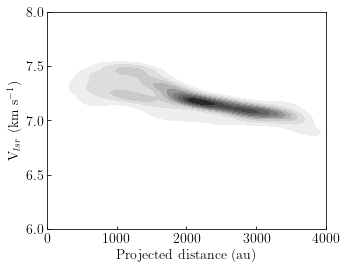

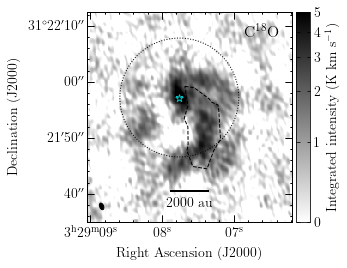

In [12]:
saveplot = 1
regionfile = 'data/region_streamer_C18O_final.reg'
r_proj, v_los = per_emb_50_get_vc_r(C18O_2_1_fit_Vc+'.fits', regionfile)

# create the grid for the kernel distribution
xmin = 0
xmax = 4000
ymin = 6.
ymax = 8.
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
#
gd_vlos = np.isfinite(r_proj*v_los)  # filter nan
values = np.vstack([r_proj[gd_vlos].value, v_los[gd_vlos].value])

kernel = stats.gaussian_kde(values)
zz = np.reshape(kernel(positions).T, xx.shape)
zz /= zz.max()  # normalization of probability

# plot for kde
fig2 = plt.figure(figsize=(5, 4))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('Projected distance (au)')
ax2.set_ylabel(r"V$_{lsr}$ (km s$^{-1}$)")
ax2.contourf(xx, yy, zz, cmap='Greys', levels=np.arange(0.1, 1.2, 0.1), vmin=0., vmax=1.1)
ax2.set_ylim([6,8])
ax2.set_xlim([0, 4000])

#Plot for image
filename = C18O_2_1_TdV
stretch = 'arcsinh'
header = fits.getheader(filename+'.fits')
freq = header['RESTFREQ'] * u.Hz
phasecent = [header['ra'], header['dec']]
vmin = 0
vmax = 5
vmid = 1
cmap='gray_r'

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='k', star_col='c', vmid=vmid)
fig.show_circles(ra_Per50, dec_Per50, pb_noema(freq).to(u.deg)*0.5,
                  ls=':', color='black')
fig.colorbar.set_axis_label_text(r'Integrated intensity (K km s$^{-1}$)')
fig.add_label(0.85, 0.9, r'C$^{18}$O', relative=True, size=16, weight='bold')
fig.show_regions(regionfile)

# Load the streamline results
modelname1 = 'C18O_0.18Msun_env'
modelname2 = 'C18O_0.39Msun_env'
pickle_in = open('analysis/streamer_model_'+modelname1+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
ra1 = streamdict['ra']
dec1 = streamdict['dec']
dsky1 = streamdict['d_sky_au']
vel1 = streamdict['vlsr']
pickle_in = open('analysis/streamer_model_'+modelname1+'_params.pickle', "rb")
paramsdict = pickle.load(pickle_in)
omega01 = paramsdict['omega0']
r01 = paramsdict['r0']
pickle_in = open('analysis/streamer_model_'+modelname2+'_vr.pickle', "rb")
streamdict = pickle.load(pickle_in)
ra2 = streamdict['ra']
dec2 = streamdict['dec']
dsky2 = streamdict['d_sky_au']
vel2 = streamdict['vlsr']
pickle_in = open('analysis/streamer_model_'+modelname2+'_params.pickle', "rb")
paramsdict = pickle.load(pickle_in)
omega02 = paramsdict['omega0']
r02 = paramsdict['r0']

v_lsr = paramsdict['v_lsr']

# Load source params
M_s = 1.71*u.Msun # was 2.9
M_env1 = 0.18*u.Msun
M_env2 = 0.39*u.Msun
M_disk = 0.58*u.Msun
Mstar1 = (M_s+M_env1+M_disk)
Mstar2 = (M_s+M_env2+M_disk)
r_c1 = SL.r_cent(Mstar1, omega01, r01)
r_c2 = SL.r_cent(Mstar2, omega02, r02)

# Add the models and labels in the kde

ax2.axhline(v_lsr.value, color='k', label=r'Per-emb-50 $v_{lsr}$', ls='--')
ax2.plot(dsky1, vel1, color='red', label=r'Streamline ($M_{env}=0.18M_{\odot}$)')
ax2.annotate(r'$r_c = {}$'.format(np.round(r_c1,0)), (0.5, 0.2), xycoords='axes fraction', size=14, color='r')
ax2.plot(dsky2, vel2, color='blue', label=r'Streamline ($M_{env}=0.39M_{\odot}$)')
ax2.annotate(r'$r_c = {}$'.format(np.round(r_c2,0)), (0.5, 0.1), xycoords='axes fraction', size=14, color='b')
ax2.legend(loc=(0.35, 0.75), frameon=False, fontsize=11)

#add the models and labels in the image
fig.show_markers(ra1, dec1, marker='o', c='red', s=0.5)
# fig.add_label(0.3, 0.3, r'$M_{env}=0.18M_{\odot}$', relative=True, size=16, color='r', weight='bold')
fig.show_markers(ra2, dec2, marker='o', c='b', s=0.5)
# fig.add_label(0.3, 0.2, r'$M_{env}=0.39M_{\odot}$', relative=True, size=16, color='b', weight='bold')

if saveplot:
  fig2.savefig('analysis/streamline_C18O_comparison_Menv_vlsr_r_kde_peremb50.pdf', dpi=300, bbox_inches='tight')
  fig.savefig('analysis/streamline_C18O_image_comparison_Menv_peremb50.pdf', dpi=300)

### N(C18O) and mass accretion results

/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


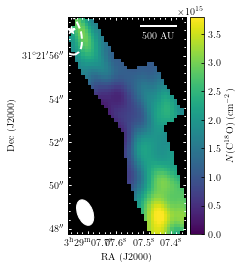

In [4]:
saveaction = 0
folder = 'analysis/column_dens_maps/'
filename = folder+'N_C18O_constantTex_15pm5K_mom0_pbcor_kink'
# folder = 'C18O/CDconfig/JEP/'
# filename = folder+'JEP_mask_multi_Per-emb-50_CD_l025l064_uvsub_C18O_pbcor_reprojectH2COs_mom0_l_kink'
stretch = 'linear'
cmap = 'viridis'
vmin = 0
vmax = 3.8e15
label_col='w'
star_col='w'
savefile = filename + '_with_cont.pdf'

distance = 293.
ang_size = (500 / distance) * u.arcsec
filename_continuum = 'continuum/Per-emb-50_CD_li_cont_rob1-selfcal'
cont_data = fits.getdata(filename_continuum+'.fits')[0]
cont_header = WCS(fits.getheader(filename_continuum+'.fits')).celestial.to_header()

# fig = plot_aplpy_standard(filename + '.fits', stretch, vmin, vmax, cmap, label_col='k', star_col='k')
fig = aplpy.FITSFigure(filename+'.fits', figsize=(4,4))
fig.show_colorscale(vmin=vmin,vmax=vmax)
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'$N(\mathrm{C}^{18}\mathrm{O})$ (cm$^{-2}$)')
# fig.colorbar.set_axis_label_text(r'Integrated intensity (K km s$^{-1}$)')
fig.show_contour(fits.PrimaryHDU(data=cont_data,header=cont_header), levels=[0.007], colors='w', linewidths=2,linestyles='dashed')
fig.add_beam()
fig.set_system_latex(True)
fig.ticks.set_color(label_col)
fig.beam.set_color('w')
# fig.beam.set_frame(True)
fig.add_scalebar(ang_size, label='2000 AU', color=label_col, corner='top right')
fig.set_nan_color('k')
fig.scalebar.set_label('500 AU')
fig.scalebar.set_font(family='monospace', weight=1000)
fig.show_markers(ra_Per50.value, dec_Per50.value, marker='*', s=60, layer='star',
                       edgecolor=star_col, facecolor=label_col, zorder=31)
fig.scalebar.set_linewidth(2)
if saveaction:
  plt.savefig(savefile, bbox_inches='tight', dpi=300)


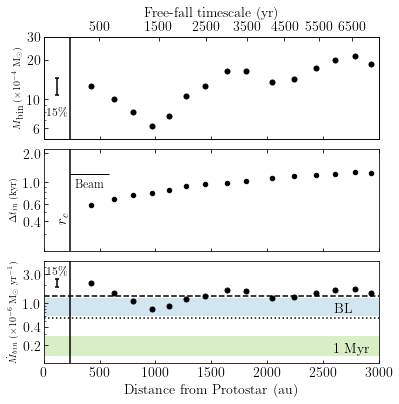

In [21]:
# If the free fall time is not trivial (like in this case), we can plot a third row
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
# from matplotlib.ticker import ScalarFormatter

fontprops = fm.FontProperties(size=12)
saveaction = 1
uncert = 0.15
savefolder = 'figures/'
savefile = savefolder + 'plot_mass_accretion_radius_rmsunc_rolledbin_wcaliberror.pdf'
# define tick function
# the conversion function is t_freefall_acc_v0 from NOEMAsetup.py

modelname = 'H2CO_0.39Msun_env'
fileinpickle = 'analysis/streamer_model_'+modelname+'_params'

pickle_in = open(fileinpickle+'.pickle', "rb")
streamdict = pickle.load(pickle_in)
r0 = streamdict['r0']
v_r0 = streamdict['v_r0']
M_s = 1.71 * u.Msun
M_env = 0.39 * u.Msun
M_disk = 0.58 * u.Msun
Mstar = (M_s + M_env + M_disk)

def tick_function(X):
  V = np.ones(np.shape(X)) * u.yr
  for i in range(len(X)):
    V[i] = t_freefall_acc_v0(0*u.au, X[i]* u.au, r0, v0=v_r0, mass=Mstar)
  V_real = V.value
  return ["%.d" % round(z,0) for z in V_real]

folder = 'analysis/'
# Just changed the uncertainties for Tex
tablefilemacc = 'M_Mdot_Tex_15pm5_mom0_pbcor_rolledbin_unc_tmodel_Menv_0.39Msun.csv'

mass_streamer_table = pd.read_csv(folder+tablefilemacc, header=0)
binradiikink = mass_streamer_table['3D distance kink (au)']
masseskink = mass_streamer_table['Mass w kink (Msun)']
umasseskink = mass_streamer_table['u Mass w kink (Msun)']
m_acclistkink = mass_streamer_table['Mdot_in w kink (Msun yr-1)']
um_acclistkink = mass_streamer_table['u Mdot_in w kink (Msun yr-1)']
times_streamlinekink = mass_streamer_table['t_ff streamline kink (yr, M_env = 0.39 Msun)']
utimes_streamlinekink = mass_streamer_table['u t_ff streamline kink (yr, M_env = 0.39 Msun)']
deltatlist = mass_streamer_table['deltat_ff streamline (yr, M_env = 0.39 Msun)']

fig = plt.figure(figsize=(6,6))
ax3 = fig.add_subplot(313)
ax3.errorbar(binradiikink, m_acclistkink*1e6, yerr=um_acclistkink*1e6, marker='o', linestyle='none', mfc='k', mec='k', ecolor='k', ms=5)
ax3.set_yscale('log')
ax3.set_xlabel('Distance from Protostar (au)')
ax3.set_ylabel(r'$\dot{M}_{bin}$ ($\times 10^{-6}$ M$_{\odot}$ yr$^{-1}$)', fontsize=10)
ax3.set_ylim([0.1,5])
ax3.axvline(237.5, color='k') # rc
ax3.set_xlim([0,3000])
ax3.axhspan(0.6, 1.2, facecolor='#a6cee3', label=r'$\dot{M}_{acc}$ BL', alpha=0.5)
ax3.axhspan(0.13, 0.28, facecolor='#b2df8a', label=r'$\dot{M}_{acc}$ 1 Myr', alpha=0.5)
ax3.vlines(120, (m_acclistkink*1e6)[0]*(1-uncert), (m_acclistkink*1e6)[0]*(1+uncert), colors='k', linewidths=1.5)
ax3.hlines(((m_acclistkink*1e6)[0]*(1-uncert), (m_acclistkink*1e6)[0]*(1+uncert)), 100, 140, colors='k', linewidths=1.5)
ax3.annotate(str(int(uncert*100))+'\%', (30, 3), xycoords='data', size=12)
ax3.annotate('BL', (2600, 0.7), xycoords='data')
ax3.annotate('1 Myr', (2600, 0.15), xycoords='data')
# ax3.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
ax3.axhline(5.6e-1, color='k', linestyle='dotted')
ax3.axhline(1.3, color='k', linestyle='dashed')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax3.set_yticks([0.2, 0.4, 1, 3])
ax3.yaxis.set_major_formatter(formatter)
# ax3.set_xticks([500, 1000, 1500, 2000, 2500])


new_tick_locations = np.array([493, 1029, 1450, 1818.3, 2153.7, 2466.4, 2761.2]) 
ax = fig.add_subplot(311, sharex=ax3)
ax.errorbar(binradiikink, masseskink*1e4, yerr=umasseskink*1e4, marker='o', linestyle='none', mfc='k', mec='k', ecolor='k', label='kink', ms=5)
ax.set_ylabel(r'$M_{\textrm{bin}}$ ($\times 10^{-4}$ M$_{\odot}$)', fontsize=10)
ax.axvline(237.5, color='k')
ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False)
ax.set_ylim([5,30])
ax.set_yscale('log')
ax.set_yticks([6, 10, 20, 30])
ax.vlines(120, (masseskink*1e4)[0]*(1-uncert), (masseskink*1e4)[0]*(1+uncert), colors='k', linewidths=1.5)
ax.hlines(((masseskink*1e4)[0]*(1-uncert), (masseskink*1e4)[0]*(1+uncert)), 100, 140, colors='k', linewidths=1.5)
ax.annotate(str(int(uncert*100))+'\%', (30, 7.5), xycoords='data', size=12)
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax1_double = ax.twiny()
ax1_double.errorbar(binradiikink, masseskink*1e4, yerr=umasseskink*1e4, marker='o', linestyle='none', mfc='k', mec='k', ecolor='k', label='kink', ms=5, alpha=0.1)
ax1_double.set_xlim([0,3000])
ax1_double.set_xticks(new_tick_locations)
ax1_double.set_xlabel('Free-fall timescale (yr)')
ax1_double.set_xticklabels(tick_function(new_tick_locations))

ax2 = fig.add_subplot(312, sharex=ax3)
ax2.scatter(binradiikink, deltatlist/1e3, s=20, facecolors='k', edgecolors='k')
ax2.set_ylabel(r'$\Delta t_{in}$ (kyr)', fontsize=10)
ax2.set_yscale('log')
ax2.set_ylim([200/1e3,2200/1e3])
# ax2.yaxis.set_major_formatter(formatter)
ax2.set_yticks([0.4, 0.6, 1, 2])
ax2.yaxis.set_major_formatter(formatter)
# ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

ax2.axvline(237.5, color='k')
ax2.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
ax2.text(100,400/1e3, r'$r_c$', size=15, rotation=90, color='k')

# scalebar
scalebar = AnchoredSizeBar(ax.transData,
                          360, 'Beam', 'upper left', 
                           pad=2,
                           color='k',
                           frameon=False,
                           size_vertical=0,
                           sep=3,
                           fontproperties=fontprops)
ax2.add_artist(scalebar)
fig.subplots_adjust(hspace=0.1)

if saveaction:
  fig.savefig(savefile, dpi=300, bbox_inches='tight')

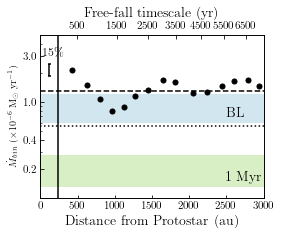

In [13]:
# to show just the last panel in a more square manner
saveaction = 1
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
# from matplotlib.ticker import ScalarFormatter

fontprops = fm.FontProperties(size=10)
saveaction = 1
uncert = 0.15
savefolder = 'figures/'
savefile = savefolder + 'plot_mass_accretion_radius_rmsunc_rolledbin_wcaliberror_lastpanel.pdf'
# define tick function
# the conversion function is t_freefall_acc_v0 from NOEMAsetup.py

modelname = 'H2CO_0.39Msun_env'
fileinpickle = 'analysis/streamer_model_'+modelname+'_params'

pickle_in = open(fileinpickle+'.pickle', "rb")
streamdict = pickle.load(pickle_in)
r0 = streamdict['r0']
v_r0 = streamdict['v_r0']
M_s = 1.71 * u.Msun
M_env = 0.39 * u.Msun
M_disk = 0.58 * u.Msun
Mstar = (M_s + M_env + M_disk)

def tick_function(X):
  V = np.ones(np.shape(X)) * u.yr
  for i in range(len(X)):
    V[i] = t_freefall_acc_v0(0*u.au, X[i]* u.au, r0, v0=v_r0, mass=Mstar)
  V_real = V.value
  return ["%.d" % round(z,0) for z in V_real]

folder = 'analysis/'
# Just changed the uncertainties for Tex
tablefilemacc = 'M_Mdot_Tex_15pm5_mom0_pbcor_rolledbin_unc_tmodel_Menv_0.39Msun.csv'

mass_streamer_table = pd.read_csv(folder+tablefilemacc, header=0)
binradiikink = mass_streamer_table['3D distance kink (au)']
masseskink = mass_streamer_table['Mass w kink (Msun)']
umasseskink = mass_streamer_table['u Mass w kink (Msun)']
m_acclistkink = mass_streamer_table['Mdot_in w kink (Msun yr-1)']
um_acclistkink = mass_streamer_table['u Mdot_in w kink (Msun yr-1)']
times_streamlinekink = mass_streamer_table['t_ff streamline kink (yr, M_env = 0.39 Msun)']
utimes_streamlinekink = mass_streamer_table['u t_ff streamline kink (yr, M_env = 0.39 Msun)']
deltatlist = mass_streamer_table['deltat_ff streamline (yr, M_env = 0.39 Msun)']

fig = plt.figure(figsize=(4,3))
new_tick_locations = np.array([493, 1029, 1450, 1818.3, 2153.7, 2466.4, 2761.2]) 
ax3 = fig.add_subplot(111)
ax3.errorbar(binradiikink, m_acclistkink*1e6, yerr=um_acclistkink*1e6, marker='o', linestyle='none', mfc='k', mec='k', ecolor='k', ms=5)
ax3.set_yscale('log')
ax3.set_xlabel('Distance from Protostar (au)')
ax3.set_ylabel(r'$\dot{M}_{bin}$ ($\times 10^{-6}$ M$_{\odot}$ yr$^{-1}$)', fontsize=10)
ax3.set_ylim([0.1,5])
ax3.axvline(237.5, color='k') # rc
ax3.set_xlim([0,3000])
ax3.axhspan(0.6, 1.2, facecolor='#a6cee3', label=r'$\dot{M}_{acc}$ BL', alpha=0.5)
ax3.axhspan(0.13, 0.28, facecolor='#b2df8a', label=r'$\dot{M}_{acc}$ 1 Myr', alpha=0.5)
ax3.vlines(120, (m_acclistkink*1e6)[0]*(1-uncert), (m_acclistkink*1e6)[0]*(1+uncert), colors='k', linewidths=1.5)
ax3.hlines(((m_acclistkink*1e6)[0]*(1-uncert), (m_acclistkink*1e6)[0]*(1+uncert)), 100, 140, colors='k', linewidths=1.5)
ax3.annotate(str(int(uncert*100))+'\%', (30, 3), xycoords='data', size=12)
ax3.annotate('BL', (2500, 0.7), xycoords='data')
ax3.annotate('1 Myr', (2500, 0.15), xycoords='data')
# ax3.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
ax3.axhline(5.6e-1, color='k', linestyle='dotted')
ax3.axhline(1.3, color='k', linestyle='dashed')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax3.set_yticks([0.2, 0.4, 1, 3])
ax3.yaxis.set_major_formatter(formatter)

ax1_double = ax3.twiny()
ax1_double.errorbar(binradiikink, m_acclistkink*1e6, yerr=um_acclistkink*1e6, marker='o', linestyle='none', mfc='k', mec='k', ecolor='k', ms=5, alpha=0.1)
ax1_double.set_xlim([0,3000])
ax1_double.set_xticks(new_tick_locations)
ax1_double.set_xlabel('Free-fall timescale (yr)')
ax1_double.set_xticklabels(tick_function(new_tick_locations))
ax1_double.tick_params(labelsize=11)
ax3.tick_params(labelsize=11)

if saveaction:
  fig.savefig(savefile, dpi=300, bbox_inches='tight')

0      426.991365
1      770.807383
2     1100.462644
3     1461.113896
4     1826.513105
5     2190.293324
6     2625.783487
7     3167.671228
8     3651.859094
9     4339.296910
10    4965.594455
11    5583.808444
12    6155.243641
13    6778.331806
14    7311.215857
Name: t_ff streamline kink (yr, M_env = 0.39 Msun), dtype: float64
[ 400.10889755  712.3373794  1020.46736509 1362.77562634 1713.11035901
 2064.34762669 2487.19890844 3016.0889114  3490.64862727 4166.94005123
 4785.16818784 5397.02538248 5963.80322785 6582.97954481 7113.38167797] yr


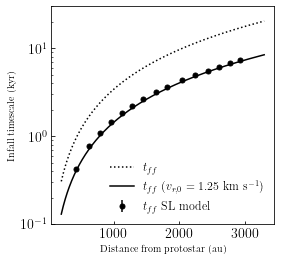

In [25]:
# needs the previous box to be run
saveaction = 0
plotname = 'analysis/t_ff_comparison_classic_SLmodel.pdf'
modelname = 'H2CO_0.39Msun_env'
fileinpickle = 'analysis/streamer_model_'+modelname+'_params'

pickle_in = open(fileinpickle+'.pickle', "rb")
streamdict = pickle.load(pickle_in)
r0 = streamdict['r0']
v_r0 = streamdict['v_r0']
M_s = 1.71 * u.Msun
M_env = 0.39 * u.Msun
M_disk = 0.58 * u.Msun
Mstar = (M_s + M_env + M_disk)

r_sample = np.arange(200, 3310, 10) *u.au
time_theory_acc = np.zeros(np.shape(r_sample)) * u.yr
for i in range(len(r_sample)):
  time_theory_acc[i] = t_freefall_acc_v0(0*u.au, r_sample[i], r0, v0=v_r0, mass=Mstar)
time_theory = t_freefall(r_sample, 2.68*u.Msun)

fig = plt.figure(figsize=(4,4))
ax2 = fig.add_subplot(111)
ax2.errorbar(binradiikink, times_streamlinekink/1e3, yerr=utimes_streamlinekink/1e3, marker='o', linestyle='none', mfc='k', mec='k', ecolor='k', ms=5, label=r'$t_{ff}$ SL model')
ax2.plot(r_sample.value, time_theory.value/1e3, 'k:', label=r'$t_{ff}$')
ax2.plot(r_sample.value, time_theory_acc.value/1e3, 'k-', label=r'$t_{ff}$ ($v_{r,0}=1.25$ km s$^{-1}$)')
ax2.set_ylabel(r'Infall timescale (kyr)', fontsize=10)
ax2.set_xlabel(r'Distance from protostar (au)', fontsize=10)
ax2.set_yscale('log')
ax2.set_ylim([0.1,30])
# ax2.set_xlim([0, 3100])
ax2.legend(frameon=False, fontsize=12)
if saveaction:
  fig.savefig(plotname, dpi=300, bbox_inches='tight')
print(times_streamlinekink)
time_theory_acc2 = np.zeros(np.shape(binradiikink)) * u.yr
for i in range(len(time_theory_acc2)):
  time_theory_acc2[i] = t_freefall_acc_v0(0*u.au, binradiikink[i]*u.au, r0, v0=v_r0, mass=Mstar)
print(time_theory_acc2)


## SO2 plots

#### Moment 0

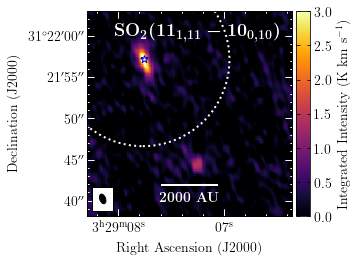

In [9]:
saveaction = 1

folder = 'SO2_11_1_11_10_0_10/CDconfig/'
filename = folder+'Per-emb-50_CD_l031l070_uvsub_SO2_multi_fitcube_stream_mom0'
cleanalg = 'Multi'
stretch = 'linear'

savefile = folder + 'C18O_'+cleanalg+'_fitcube_total_mom0' + '_'+stretch + '.pdf'
vmin = 0
vmax = 3
vmid = 0.5
cmap = 'inferno'
title = r'\textbf{SO\boldmath$_{2}$($11_{1,11}-10_{0,10}$)}'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.add_label(0.95,0.9, title, color='w',
               relative=True, horizontalalignment='right', size=18)
# fig.add_label(0.95,0.80, cleanalg, color='k',
#                relative=True, horizontalalignment='right', size=18)
fig.scalebar.set_label(r'\textbf{2000 AU}')

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

#### SO2 Position-velocity diagram

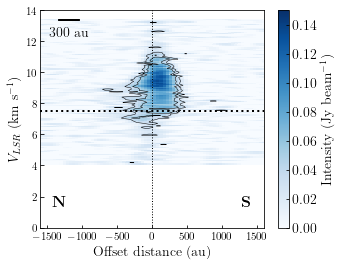

In [56]:
saveaction = 0

pvfile = SO2_11_1_11_10_0_10_PV
savefile = 'figures/PVdiagram_SO2_pvline_center_Per50_1arcsec_170PA_12arcsec.pdf'
v_lsr = 7.48*u.km/u.s  # +- 0.14 km/s according to out C18O data
arcsectoau = 293  # * u.au / u.arcsec
pvdata = fits.getdata(pvfile+'.fits')
pvheader = fits.getheader(pvfile+'.fits')
rms = 0.01
contourlevels = np.array([3,5,15,25,35, 45]) * rms
# contourlevels = np.array([3,5]) * rms
vmin = 0
vmax = 0.15

delta0 = pvheader['CRVAL1']
delta_delta = pvheader['CDELT1']
delta_pix0 = pvheader['CRPIX1']
delta_npix = pvheader['NAXIS1']
vel0 = pvheader['CRVAL2']
delta_vel = pvheader['CDELT2']
vel_pix0 = pvheader['CRPIX2']
vel_npix = pvheader['NAXIS2']

delta_array = np.array([delta0 + delta_delta*(i-delta_pix0) for i in range(delta_npix)]) * u.deg
vel_array = np.array([vel0 + delta_vel * (i - vel_pix0) for i in range(vel_npix)]) * u.m/u.s

# transformation to general coordinates
vel_array = vel_array.to(u.km/u.s)
mid_delta = delta_array[int(len(delta_array)/2+2-1)]
offset_array = (delta_array - mid_delta).to(u.arcsec)
distance_array = offset_array.value * arcsectoau * u.au

offset, vel = np.meshgrid(distance_array, vel_array)

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
norm = simple_norm(pvdata, 'linear', min_cut=vmin,max_cut=vmax)
pcolor = ax.pcolor(offset.value, vel.value, pvdata, shading='auto', norm=norm, cmap='Blues')
contours = ax.contour(offset.value, vel.value, pvdata, contourlevels, colors='k', linewidths=0.5)
fig.colorbar(pcolor, ax=ax, label=r'Intensity (Jy beam$^{-1}$)')
    
ax.axhline(v_lsr.value, color='k', linestyle=':', linewidth=2)
ax.axvline(0, color='k', linestyle=':', linewidth=1)
ax.set_ylim([0, 14])
ax.set_ylabel(r'$V_{LSR}$ (km s$^{-1}$)')
ax.set_xlim([-1600, 1600])
ax.set_xticks([-1500, -1000, -500, 0, 500, 1000, 1500])
ax.tick_params(labelsize=11)
ax.set_xlabel('Offset distance (au)')
ax.annotate(r'\textbf{N}', (0.05, 0.1), xycoords='axes fraction', color='k', size=16)
ax.annotate(r'\textbf{S}', (0.90, 0.1), xycoords='axes fraction', color='k', size=16)

bar = AnchoredSizeBar(ax.transData, 300, '300 au', 2, pad=0.1, borderpad=0.5, sep=5,  frameon=False, color='k', size_vertical=0.08)
ax.add_artist(bar)

if saveaction:
  plt.savefig(savefile, bbox_inches='tight', dpi=300)

SO2 mom0 zoom with SO and H2CO contours and sample region

Text labels do not have attribute linewidth. Skipping.


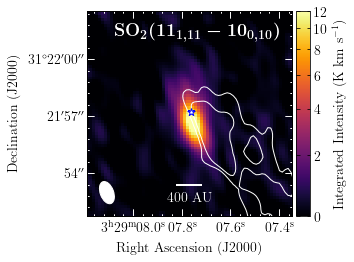

In [62]:
saveaction = 1

folder = 'figures/'
filename = SO2_11_1_11_10_0_10_TdV
stretch = 'arcsinh'
savefile = folder + 'SO2_total_mom0_H2CO_cont.pdf'
vmin = 0
vmax = 12
vmid = 3
cmap = 'inferno'
title = r'\textbf{SO\boldmath$_{2}$($11_{1,11}-10_{0,10}$)}'

filename_H2COcontour = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube_stream_mom0'
levelsH2CO = [0.75, 1.25]
regionsfile = folder+'samples_subset.reg'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]
ang_size = (400/293)*u.arcsec

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.recenter(phasecent[0], phasecent[1], 0.0015)
fig.show_contour(filename_H2COcontour+'.fits', levels=levelsH2CO, colors='w', linewidths=1)
# fig.show_regions(regionsfile)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 AU')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.beam.set_color('w')

fig.add_label(0.95,0.9, title, color='w', relative=True, horizontalalignment='right', size=18)
# fig.scalebar.set_label(r'\textbf{2000 AU}')
 

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

Text labels do not have attribute linewidth. Skipping.


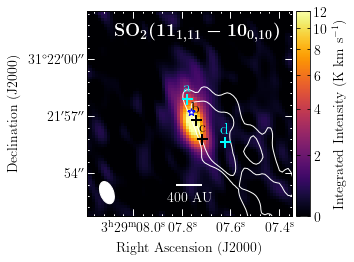

In [52]:
# with regions
saveaction = 1

folder = 'figures/'
filename = SO2_11_1_11_10_0_10_TdV
stretch = 'arcsinh'
savefile = folder + 'SO2_total_mom0_H2CO_cont_wregions.pdf'
vmin = 0
vmax = 12
vmid = 3
cmap = 'inferno'
title = r'\textbf{SO\boldmath$_{2}$($11_{1,11}-10_{0,10}$)}'

filename_H2COcontour = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube_stream_mom0'
levelsH2CO = [0.75, 1.25]

filename_regions = 'figures/spectra_regs_SO_SO2_2.reg'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]
ang_size = (400/293)*u.arcsec

fig = plot_aplpy_standard(filename+'.fits', stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_axis_label_text(r'Integrated Intensity (K km s$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.recenter(phasecent[0], phasecent[1], 0.0015)
fig.show_contour(filename_H2COcontour+'.fits', levels=levelsH2CO, colors='w', linewidths=1)
fig.show_regions(filename_regions)
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 AU')
fig.tick_labels.set_xformat('hh:mm:ss.s')
fig.beam.set_color('w')

fig.add_label(0.95,0.9, title, color='w', relative=True, horizontalalignment='right', size=18)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

SO2 with H2CO contours

# Continuum Image (preliminary, self-cal)

Text labels do not have attribute linewidth. Skipping.


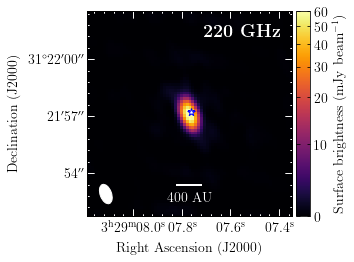

In [26]:
saveaction = 1

folder = 'figures/'
filename = continuum_selfcal
cleanalg = 'Multi'
stretch = 'arcsinh'

savefile = folder + 'continuum_li_selfcal_'+stretch + '.pdf'
vmin = 0
vmax = 60
vmid = 10
cmap = 'inferno'
title = r'\textbf{220 GHz}'
ang_size = (400 / 293) * u.arcsec

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFREQ'] * u.Hz
phasecent = [headercube['ra'], headercube['dec']]
wcscel = WCS(headercube).celestial
new_header = wcscel.to_header()
new_header['bmaj'] = headercube['bmaj']
new_header['bmin'] = headercube['bmin']
new_header['bpa'] = headercube['bpa']
new_hdu = fits.PrimaryHDU(data=fits.getdata(filename+'.fits')[0]*1000,header=new_header)
fig = plot_aplpy_standard(new_hdu, stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_axis_label_text(r'Surface brightness (mJy beam$^{-1}$)')
fig.scalebar.set_length(ang_size)
fig.scalebar.set_label('400 AU')
fig.show_circles(phasecent[0], phasecent[1], (pb_noema(freq).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.add_label(0.95,0.9, title, color='w',
               relative=True, horizontalalignment='right', size=18)
# fig.add_label(0.95,0.80, cleanalg, color='k',
#                relative=True, horizontalalignment='right', size=18)
# fig.recenter(ra_Per50.value, dec_Per50.value, (10*u.arcsec).to(u.deg).value)
fig.recenter(phasecent[0], phasecent[1], 0.0015)
fig.beam.set_frame(False)
fig.beam.set_color('w')
fig.tick_labels.set_xformat('hh:mm:ss.s')
if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

# Additional plots: NGC 1333 in C18O emission

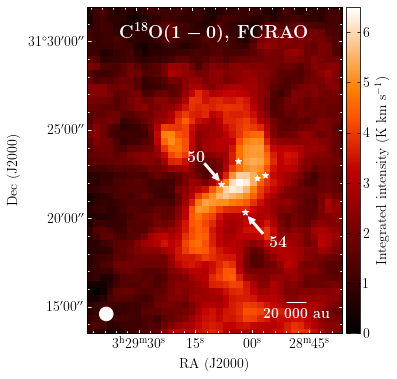

In [54]:
ra_starsI = [052.2823333, 52.2638750, 52.2435000, 52.2346250, 52.2565417]
dec_starsI = [31.3658889, 31.3873889, 31.3715000, 31.3743889, 31.3390833]

# 50, 57, 58, 65, 54
gc = aplpy.FITSFigure('data/NGC1333_C18O_1-0_FCRAO_Hatchell_fix_mom0_5_10kms.fits', figsize = (6,6))
gc.show_colorscale(vmin = 0, vmax = 6.5, cmap='gist_heat')
gc.add_colorbar()
gc.colorbar.set_axis_label_text(r'Integrated intensity (K km s$^{-1}$)')
gc.recenter(52.2899183, 31.3785780, width=0.2403073, height=0.3072837)
# gc.show_regions('proposed_region_new.reg')
gc.add_beam()
gc.beam.set_color('w')
gc.show_markers(ra_starsI, dec_starsI, c='w', s=40, marker='*')
gc.tick_labels.set_yformat('dd:mm:ss')
gc.add_label(0.5, 0.92, r'\textbf{C\boldmath$^{18}$O($1-0$), FCRAO}', relative=True, size=18, color='w')
# star is the size of the primary beam of noema
gc.add_scalebar(0.0189, color='w')
gc.scalebar.set_label(r'\textbf{20 000 au}')
gc.show_arrows(52.3011859, 31.3852824, -0.0158464, -0.0158464, color='w', width=0.3, head_width=1, head_length=1)
gc.show_arrows(52.2377113, 31.3193435, 0.0158464, 0.0158464, color='w', width=0.3, head_width=1, head_length=1)
gc.add_label(52.31, 31.39, r'\textbf{50}', size=16, color='w')
gc.add_label(52.22, 31.31, r'\textbf{54}', size=16, color='w')
plt.savefig('figures/NGC1333_C18O_1-0_FCRAO_Hatchell_fix_mom0_5_10kms_wprotostars.pdf', bbox_inches='tight') 

# Spectra plots of all molecules

In [3]:
import regions

def degtohoursRA(deg):
    hours = deg / 360 * 24
    hh = np.trunc(hours).astype('int64')
    minutes = ((hours-hh) % 60) * 60
    mm = np.trunc(minutes).astype('int64')
    seconds = ((minutes-mm) % 60) * 60
    ss = np.round(seconds, 2)
    return '{0:02d}:{1:02d}:{2:0>5}'.format(hh, mm, ss)


def degtohoursDEC(deg):
    dd = np.trunc(deg).astype('int64')
    minutes = ((np.abs(deg)-np.abs(dd)) % 60) * 60
    mm = np.trunc(minutes).astype('int64')
    seconds = ((minutes-mm) % 60) * 60
    ss = np.round(seconds, 2)
    return '{0:02d}:{1:02d}:{2:0>5}'.format(dd, mm, ss)

def hourstodegRA(hours, minutes, seconds):
    deg = 15 * hours + 60 * minutes + 60 * seconds    
    return deg

def degtodegDEC(degrees, minutes, seconds):
    deg = degrees + 60 * minutes + 60 * seconds    
    return deg

def getPositionFromRegions(regionfile):
    regionload = regions.read_ds9(regionfile)
    positions = [[regionload[i].center.ra.value, regionload[i].center.dec.value] for i in range(len(regionload))]
    regionlabels = [regionload[i].meta['label'] for i in range(len(regionload))]
    return positions, regionlabels

def get_spectra(cube, position, velstart, velend):
    '''
    Extracts the spectra (velocity, intensity) given a cube.
    
    Returns the spectra of the cube given, in the native units of the cube. 
    
    Args:
        cube (SpectralCube): datacube 
        position (NDarray): array size 2 containing ra and dec
        velstart (astropy.units): initial velocity of the spectra in u.km/u.s
        velend (astropy.units): final velocity of the spectra in u.km/u.s
    '''
    cubenew = cube.spectral_slab(velstart, velend)
    cubehead = cubenew.header
    bmaj = cubehead['bmaj'] * u.deg
    bmin = cubehead['bmin'] * u.deg
    beamarea = (1.133 * bmaj * bmin).to(u.arcsec**2)
    restfreq = cubehead['restfreq'] * u.Hz
    cubewcs = WCS(cubehead)
    ra, dec = cubewcs.celestial.all_world2pix(position[0], position[1], 0)
#     rah = degtohoursRA(position[0])
#     dech = degtohoursDEC(position[1])
    velocities = cubenew.spectral_axis
    intensities = cubenew[:, int(dec), int(ra)]
    return velocities, intensities

def get_parameters_spectra(paramcube, position, header):
    '''
    This function returns all the contents in the cube along the spectra. 
    This means it returns errors as well if the paramscube includes them
    
    Args:
        paramcube (ndarray): cube with the parameters and errors for each parameter
        position (NDarray): array size 2 containing ra and dec in degrees
        header (SpectralCube.header): header to transform the wcs into pixel positions
    '''
    cubewcs = WCS(header)
    ra, dec = cubewcs.celestial.all_world2pix(position[0], position[1], 0)
    params = paramcube[:, int(dec), int(ra)]
    return params

### H2CO versus C18O



In [5]:
# load all the cubes here (primary beam corrected)
cubeC18O = SpectralCube.read(C18O_2_1+'_pbcor.fits').with_spectral_unit(u.km/u.s).to(u.K)
cubeH2CO = SpectralCube.read(H2CO_303_202+'_pbcor.fits').with_spectral_unit(u.km/u.s).to(u.K)
cubeSO = SpectralCube.read(SO_55_44+'_pbcor.fits').with_spectral_unit(u.km/u.s).to(u.K)
cubeSO2 = SpectralCube.read(SO2_11_1_11_10_0_10+'_pbcor.fits').with_spectral_unit(u.km/u.s).to(u.K)

#colorscheme:
#e41a1c red
#377eb8 blue
#4daf4a green
#984ea3 purple
#ff7f00 orange
#ffff33 yellow
#a65628 brown
#f781bf PANK

colorC18O = '#984ea3'
colorH2CO = '#377eb8'
colorSO = '#4daf4a'
colorSO2 = '#e41a1c'

This function (<function BaseSpectralCube.to at 0x7fd6b9950c10>) requires loading the entire cube into memory and may therefore be slow.
This function (<function BaseSpectralCube.to at 0x7fd6b9950c10>) requires loading the entire cube into memory and may therefore be slow.
This function (<function BaseSpectralCube.to at 0x7fd6b9950c10>) requires loading the entire cube into memory and may therefore be slow.
This function (<function BaseSpectralCube.to at 0x7fd6b9950c10>) requires loading the entire cube into memory and may therefore be slow.


#### H2CO plot of spectra in selected positions

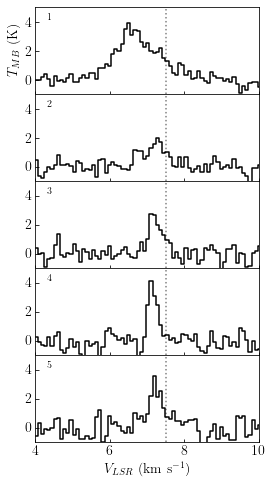

In [6]:
# this are the primary beam corrected spectra
positionfile = 'figures/spectra_regs_H2CO.reg'
positions, labels = getPositionFromRegions(positionfile)

# define constants
velinit = 4 *u.km/u.s
velend = 10 * u.km/u.s

# prepare the plot
fig, axlist = plt.subplots(nrows=len(positions), ncols=1, figsize=(4,8), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
axlist[len(axlist)-1].set_xticks([2,4,6,8,10])
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

# plot for each cell in the figure
for position, label, ax in zip(positions, labels, axlist):
    # extract the spectra from both cubes
    spectraH2CO = get_spectra(cubeH2CO, position, velinit, velend)
    # plot each spectra with a different color
    ax.plot(spectraH2CO[0].value, spectraH2CO[1].value, color='k', label=r'H$_{2}$CO', drawstyle='steps-mid')
    axlist[len(axlist)-1].set_xlim([velinit.value, velend.value])
    ax.set_ylim([-1,5])
#     ax.set_yticks([0,3,6,9])
    ax.text(0.05, 0.85, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=10)
    ax.axvline(7.5, color='k', ls='dotted', alpha=0.5)
#axlist[0].legend(loc=0, frameon=False, fontsize=10)

plt.savefig('figures/spectra_H2CO_regions_pbcor.pdf', bbox_inches='tight')


This function (<function BaseSpectralCube.to at 0x7fd6b9950c10>) requires loading the entire cube into memory and may therefore be slow.


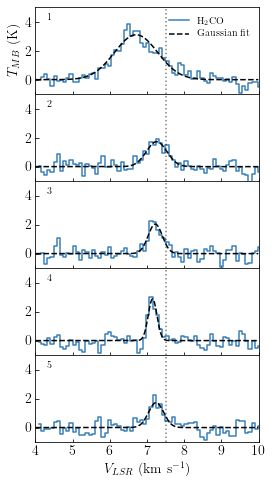

In [13]:
# same fit as before but with the best-fit Gaussians
# recall this is not primary beam corrected

positionfile = 'figures/spectra_regs_H2CO.reg'
positions, labels = getPositionFromRegions(positionfile)
cubeH2CO_small = SpectralCube.read('H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube.fits').with_spectral_unit(u.km/u.s).to(u.K)
# we want the program to check whether the best fit is 1, 2 or 3g
paramsfile = H2CO_303_202_fitparams + '.fits'
paramscube = fits.getdata(paramsfile)

# define constants
velinit = 4 *u.km/u.s
velend = 10 * u.km/u.s
header = cubeH2CO_small.header
vel = np.arange(velinit.value, velend.value, step=0.01)

# prepare the plot
fig, axlist = plt.subplots(nrows=len(positions), ncols=1, figsize=(4,8), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
axlist[len(axlist)-1].set_xlim([velinit.value, velend.value])
# axlist[len(axlist)-1].set_xticks([2,4,6,8,10])
axlist[len(axlist)-1].xaxis.set_major_locator(plt.MaxNLocator(6))
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

# plot for each cell in the figure
for position, label, ax in zip(positions, labels, axlist):
    # extract the spectra from both cubes
    spectraH2CO = get_spectra(cubeH2CO_small, position, velinit, velend)
    params = get_parameters_spectra(paramscube, position, header)
    g1 = models.Gaussian1D(amplitude=params[0], mean=params[1], stddev=params[2])
    # plot each spectra with a different color
    ax.plot(spectraH2CO[0].value, spectraH2CO[1].value, color=colorH2CO, label=r'H$_{2}$CO', drawstyle='steps-mid')
    ax.plot(vel, g1(vel), color='k', linestyle='dashed', label='Gaussian fit')
    ax.set_ylim([-1,5])
#     ax.set_yticks([0,3,6,9])
    ax.text(0.05, 0.85, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=10)
    ax.axvline(7.5, color='k', ls='dotted', alpha=0.5)
axlist[0].legend(loc=0, frameon=False, fontsize=10)
plt.savefig('figures/spectra_H2CO_regions_fit.pdf', bbox_inches='tight', dpi=300)

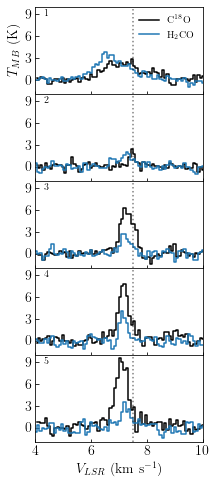

In [19]:
positionfile = 'figures/spectra_regs_H2CO.reg'
positions, labels = getPositionFromRegions(positionfile)

# define constants
velinit = 4 *u.km/u.s
velend = 10 * u.km/u.s

# prepare the plot
fig, axlist = plt.subplots(nrows=len(positions), ncols=1, figsize=(3,8), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
# axlist[len(axlist)-1].set_xticks([2,4,6,8,10])
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

# plot for each cell in the figure
for position, label, ax in zip(positions, labels, axlist):
    # extract the spectra from both cubes
    spectraC18O = get_spectra(cubeC18O, position, velinit, velend)
    spectraH2CO = get_spectra(cubeH2CO, position, velinit, velend)
    # plot each spectra with a different color
    ax.plot(spectraC18O[0].value, spectraC18O[1].value, color='k', label=r'C$^{18}$O', drawstyle='steps-mid')
    ax.plot(spectraH2CO[0].value, spectraH2CO[1].value, color='C0', label=r'H$_{2}$CO', drawstyle='steps-mid')
    axlist[len(axlist)-1].set_xlim([velinit.value, velend.value])
    ax.set_ylim([-2,10])
    ax.set_yticks([0,3,6,9])
    ax.text(0.05, 0.9, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=10)
    ax.axvline(7.5, color='k', ls='dotted', alpha=0.5)
axlist[0].legend(loc=0, frameon=False, fontsize=10)

plt.savefig('figures/spectra_H2CO_C18O_regions.pdf', bbox_inches='tight')

<Quantity 0.34625231 K>

### H2CO versus SO and SO2

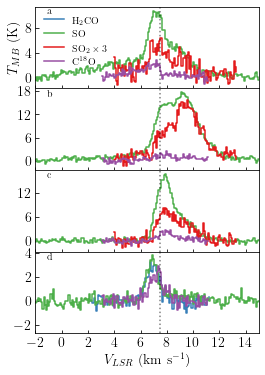

In [50]:
# we first plot the H2CO, SO and SO2 together in regions a, b and d
positionfile = 'figures/spectra_regs_SO_SO2.reg'
positions, labels = getPositionFromRegions(positionfile)

# here we select the labels we do want to plot
# positionsPlot = []
# labelsPlot = ['a', 'b', 'd']
# indexes = np.zeros(np.shape(labels), dtype=int)
# for labelwant in labelsPlot:
#     indexes += np.where(np.array(labels)==labelwant, 1, 0)
# # indexes = np.where(np.where(np.array(labels)==labelsPlot[0], 1, 0) + np.where(np.array(labels)==labelsPlot[1], 1, 0) + np.where(np.array(labels)==labelsPlot[2], 1, 0))
# indexes = np.where(indexes)
# for index in indexes[0]:
#     positionsPlot.append(positions[index][:])
    
# define constants
velinit = -2 *u.km/u.s
velend = 15 * u.km/u.s
header = cubeC18O.header
bmaj = header['bmaj'] * u.deg
bmin = header['bmin'] * u.deg
beamarea = (1.133 * bmaj * bmin).to(u.arcsec**2)
restfreq = header['restfreq'] * u.Hz
rms = (11.97 *u.mJy/u.beam).to(u.K, u.brightness_temperature(restfreq, beam_area=beamarea))

fig, axlist = plt.subplots(nrows=len(positions), ncols=1, figsize=(4,6), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
# axlist[len(axlist)-1].set_xticks([2,4,6,8,10])
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

for position, label, ax in zip(positions, labels, axlist):
    # extract the spectra from both cubes
    spectraH2CO = get_spectra(cubeH2CO, position, velinit, velend)
    spectraSO = get_spectra(cubeSO, position, velinit, velend)
    spectraSO2 = get_spectra(cubeSO2, position, velinit, velend)
    spectraC18O = get_spectra(cubeC18O, position, velinit, velend)
    # plot each spectra with a different color
    line_H2CO, = ax.plot(spectraH2CO[0].value, spectraH2CO[1].value, color=colorH2CO, label=r'H$_{2}$CO', drawstyle='steps-mid')
    line_SO, = ax.plot(spectraSO[0].value, spectraSO[1].value, color=colorSO, label=r'SO', drawstyle='steps-mid')
    line_SO2, = ax.plot(spectraSO2[0].value, spectraSO2[1].value*3, color=colorSO2, label=r'SO$_{2}\times 3$', drawstyle='steps-mid')
    line_C18O, = ax.plot(spectraC18O[0].value, spectraC18O[1].value, color=colorC18O, label=r'C$^{18}$O', drawstyle='steps-mid')
    if label=='a': ax.legend(loc=0, frameon=False, fontsize=10)
    if spectraH2CO[1].max().value < 5 * rms.value: line_H2CO.set_visible(False)
    if spectraSO[1].max().value < 5 * rms.value: line_SO.set_visible(False)
    if spectraSO2[1].max().value < 5 * rms.value: line_SO2.set_visible(False)
    if spectraC18O[1].max().value < 5 * rms.value: line_C18O.set_visible(False)
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
#     ax.set_ylim([-2,10])
#     ax.set_yticks([0,3,6,9])
    ax.text(0.05, 0.9, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=10)
    ax.axvline(7.5, color='k', ls='dotted', alpha=0.5)
axlist[len(axlist)-1].set_xlim([velinit.value, velend.value])    
axlist[len(axlist)-1].xaxis.set_major_locator(plt.MaxNLocator(9))
# plt
plt.savefig('figures/spectra_SO_SO2_H2CO_reg_SO.pdf', bbox_inches='tight')

This function (<function BaseSpectralCube.to at 0x7fbbf197dc10>) requires loading the entire cube into memory and may therefore be slow.


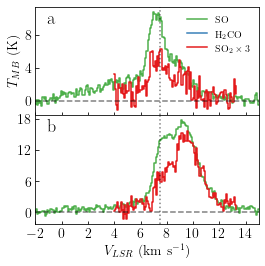

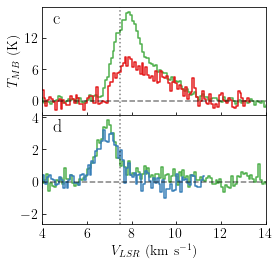

In [7]:
# load the files (recall we already loaded the cubes)
saveaction = 1
positionfile = 'figures/spectra_regs_SO_SO2.reg'
positions, labels = getPositionFromRegions(positionfile)
cubeSO_small = SpectralCube.read('SO_55_44/CDconfigsmall/gaussian_fit_123G_fitcube2g/Per-emb-50_CD_l009l048_uvsub_SO_multi_small_fitcube2g_K.fits').with_spectral_unit(u.km/u.s).to(u.K)
velinit = -2 *u.km/u.s
velend = 15 * u.km/u.s
header = cubeC18O.header
bmaj = header['bmaj'] * u.deg
bmin = header['bmin'] * u.deg
beamarea = (1.133 * bmaj * bmin).to(u.arcsec**2)
restfreq = header['restfreq'] * u.Hz
rms = (11.97 *u.mJy/u.beam).to(u.K, u.brightness_temperature(restfreq, beam_area=beamarea))

# prepare the plot
# we do one plot for ab and other for cd
# first set: a and b
fig, axlist = plt.subplots(nrows=2, ncols=1, figsize=(4,4), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

    
# plot for each cell in the figure
for position, label, ax in zip(positions[:2], labels[:2], axlist):
    # extract the spectra from both cubes
    spectraH2CO = get_spectra(cubeH2CO, position, velinit, velend)
    spectraSO = get_spectra(cubeSO, position, velinit, velend)
    spectraSO2 = get_spectra(cubeSO2, position, velinit, velend)
#     spectraC18O = get_spectra(cubeC18O, position, velinit, velend)
    # plot each spectra with a different color
    line_SO, = ax.plot(spectraSO[0].value, spectraSO[1].value, color=colorSO, label=r'SO', drawstyle='steps-mid')
    line_H2CO, = ax.plot(spectraH2CO[0].value, spectraH2CO[1].value, color=colorH2CO, label=r'H$_{2}$CO', drawstyle='steps-mid')
    line_SO2, = ax.plot(spectraSO2[0].value, spectraSO2[1].value*3, color=colorSO2, label=r'SO$_{2}\times 3$', drawstyle='steps-mid')
#     line_C18O, = ax.plot(spectraC18O[0].value, spectraC18O[1].value*3, color='C3', label=r'C$^{18}$O $\times 3$', drawstyle='steps-mid')
    if label=='a': ax.legend(loc=0, frameon=False, fontsize=10)
    if spectraH2CO[1].max().value < 5 * rms.value: line_H2CO.set_visible(False)
    if spectraSO[1].max().value < 5 * rms.value: line_SO.set_visible(False)
    if spectraSO2[1].max().value < 5 * rms.value: line_SO2.set_visible(False)
#     if spectraC18O[1].max().value < 5 * rms.value: line_C18O.set_visible(False)
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
#     ax.set_ylim([-2,10])
#     ax.set_yticks([0,3,6,9])
    ax.text(0.05, 0.85, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=18)
    ax.axvline(7.5, color='k', ls='dotted', alpha=0.5)
    ax.axhline(0, color='k', ls='dashed', alpha=0.5)
axlist[len(axlist)-1].set_xlim([velinit.value, velend.value])    
axlist[len(axlist)-1].xaxis.set_major_locator(plt.MaxNLocator(9))
if saveaction:
    plt.savefig('figures/spectra_SO_SO2_H2CO_reg_SO_ab.pdf', bbox_inches='tight')

# second set: c and d 
fig, axlist = plt.subplots(nrows=2, ncols=1, figsize=(4,4), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

# plot for each cell in the figure
for position, label, ax in zip(positions[2:], labels[2:], axlist):
    # extract the spectra from both cubes
    spectraH2CO = get_spectra(cubeH2CO, position, velinit, velend)
    spectraSO = get_spectra(cubeSO, position, velinit, velend)
    spectraSO2 = get_spectra(cubeSO2, position, velinit, velend)
#     spectraC18O = get_spectra(cubeC18O, position, velinit, velend)
    # plot each spectra with a different color
    line_SO, = ax.plot(spectraSO[0].value, spectraSO[1].value, color=colorSO, label=r'SO', drawstyle='steps-mid')
    line_H2CO, = ax.plot(spectraH2CO[0].value, spectraH2CO[1].value, color=colorH2CO, label=r'H$_{2}$CO', drawstyle='steps-mid')
    line_SO2, = ax.plot(spectraSO2[0].value, spectraSO2[1].value*3, color=colorSO2, label=r'SO$_{2}\times 3$', drawstyle='steps-mid')
#     line_C18O, = ax.plot(spectraC18O[0].value, spectraC18O[1].value*3, color='C3', label=r'C$^{18}$O $\times 3$', drawstyle='steps-mid')
    if label=='a': ax.legend(loc=0, frameon=False, fontsize=10)
    if spectraH2CO[1].max().value < 5 * rms.value: line_H2CO.set_visible(False)
    if spectraSO[1].max().value < 5 * rms.value: line_SO.set_visible(False)
    if spectraSO2[1].max().value < 5 * rms.value: line_SO2.set_visible(False)
#     if spectraC18O[1].max().value < 5 * rms.value: line_C18O.set_visible(False)
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
#     ax.set_ylim([-2,10])
#     ax.set_yticks([0,3,6,9])
    ax.text(0.05, 0.85, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=18)
    ax.axvline(7.5, color='k', ls='dotted', alpha=0.5)
    ax.axhline(0, color='k', ls='dashed', alpha=0.5)
axlist[len(axlist)-1].set_xlim([4, 14])    
axlist[len(axlist)-1].xaxis.set_major_locator(plt.MaxNLocator(6))
if saveaction:
    plt.savefig('figures/spectra_SO_SO2_H2CO_reg_SO_cd.pdf', bbox_inches='tight')

#### Plot SO spectra with different gaussian fits

This function (<function BaseSpectralCube.to at 0x7fa1231b40d0>) requires loading the entire cube into memory and may therefore be slow.


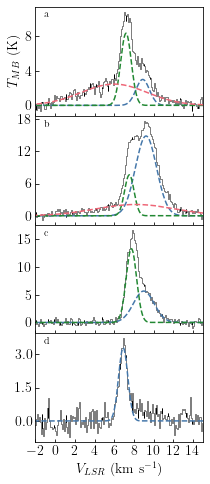

In [24]:
# load the files (recall we already loaded the cubes)
positionfile = 'figures/spectra_regs_SO_SO2.reg'
positions, labels = getPositionFromRegions(positionfile)
cubeSO_small = SpectralCube.read('SO_55_44/CDconfigsmall/gaussian_fit_123G_fitcube2g/Per-emb-50_CD_l009l048_uvsub_SO_multi_small_fitcube2g_K.fits').with_spectral_unit(u.km/u.s).to(u.K)
# we want the program to check whether the best fit is 1, 2 or 3g
paramsfile = 'SO_55_44/CDconfigsmall/gaussian_fit_123G_fitcube2g/Per-emb-50_CD_l009l048_uvsub_SO_multi_small_{}G_fitparams_aicres.fits'
paramscube1 = fits.getdata(paramsfile.format(1))
paramscube2 = fits.getdata(paramsfile.format(2))
paramscube3 = fits.getdata(paramsfile.format(3))

# define constants
velinit = -2 *u.km/u.s
velend = 15 * u.km/u.s
header = cubeSO_small.header
bmaj = header['bmaj'] * u.deg
bmin = header['bmin'] * u.deg
beamarea = (1.133 * bmaj * bmin).to(u.arcsec**2)
restfreq = header['restfreq'] * u.Hz
rms = (11.97 *u.mJy/u.beam).to(u.K, u.brightness_temperature(restfreq, beam_area=beamarea))

# prepare the plot
fig, axlist = plt.subplots(nrows=len(positions), ncols=1, figsize=(3,8), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

# plot for each cell in the figure
for position, label, ax in zip(positions, labels, axlist):
    params1 = get_parameters_spectra(paramscube1, position, header)
    params2 = get_parameters_spectra(paramscube2, position, header)
    params3 = get_parameters_spectra(paramscube3, position, header)
    spectraSO_small = get_spectra(cubeSO_small, position, velinit, velend)
    ax.plot(spectraSO_small[0].value, spectraSO_small[1].value, color='k', label=r'SO', drawstyle='steps-mid', linewidth=0.5)
    ax.text(0.05, 0.9, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=10)
    
    if params1[0] is not np.nan:
        g1 = models.Gaussian1D(amplitude=params1[0], mean=params1[1], stddev=params1[2])
        ax.plot(spectraSO_small[0].value, g1(spectraSO_small[0].value), color='#4477aa', linestyle='dashed')
        
    if params2[0] is not np.nan:
        g1 = models.Gaussian1D(amplitude=params2[0], mean=params2[1], stddev=params2[2])
        g2 = models.Gaussian1D(amplitude=params2[3], mean=params2[4], stddev=params2[5])
        ax.plot(spectraSO_small[0].value, g1(spectraSO_small[0].value), color='#4477aa', linestyle='dashed')
        ax.plot(spectraSO_small[0].value, g2(spectraSO_small[0].value), color='#228833', linestyle='dashed')
        
    if params3[0] is not np.nan:
        g1 = models.Gaussian1D(amplitude=params3[0], mean=params3[1], stddev=params3[2])
        g2 = models.Gaussian1D(amplitude=params3[3], mean=params3[4], stddev=params3[5])
        g3 = models.Gaussian1D(amplitude=params3[6], mean=params3[7], stddev=params3[8])
        ax.plot(spectraSO_small[0].value, g1(spectraSO_small[0].value), color='#4477aa', linestyle='dashed')
        ax.plot(spectraSO_small[0].value, g2(spectraSO_small[0].value), color='#228833', linestyle='dashed')
        ax.plot(spectraSO_small[0].value, g3(spectraSO_small[0].value), color='#ee6677', linestyle='dashed')
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    
        
axlist[len(axlist)-1].set_xlim([velinit.value, velend.value])    
axlist[len(axlist)-1].xaxis.set_major_locator(plt.MaxNLocator(9))
# plt.savefig('figures/spectra_SO_with_gaussfit.pdf', bbox_inches='tight')

### Plot SO spectra with curves per component

This function (<function BaseSpectralCube.to at 0x7fbbf197dc10>) requires loading the entire cube into memory and may therefore be slow.


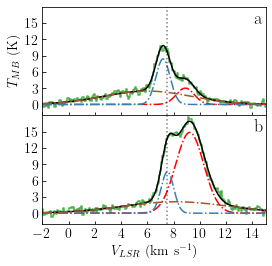

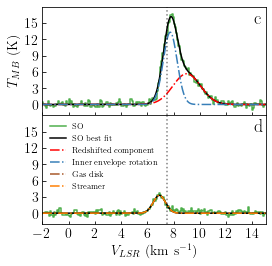

In [10]:
# load the files (recall we already loaded the cubes)
positionfile = 'figures/spectra_regs_SO_SO2.reg'
positions, labels = getPositionFromRegions(positionfile)
cubeSO_small = SpectralCube.read('SO_55_44/CDconfigsmall/gaussian_fit_123G_fitcube2g/Per-emb-50_CD_l009l048_uvsub_SO_multi_small_fitcube2g_K.fits').with_spectral_unit(u.km/u.s).to(u.K)
# we want the program to check whether the compoonent is there

paramsfile = 'SO_55_44/CDconfigsmall/gaussian_fit_123G_fitcube2g/Per-emb-50_CD_l009l048_uvsub_SO_multi_small_gaussian_{}_model.fits'
paramsInfallcube = fits.getdata(paramsfile.format('infall'))
paramsRotationcube = fits.getdata(paramsfile.format('rotation'))
paramsDiskcube = fits.getdata(paramsfile.format('wings'))
paramsStreamercube = fits.getdata(paramsfile.format('streamer'))
#colorscheme:
#e41a1c red (SO)
#377eb8 blue (H2CO)
#4daf4a green (SO2)
#984ea3 purple (C18O)
#ff7f00 orange
#ffff33 yellow
#a65628 brown
#f781bf PANK

colordisk = '#a65628'
colorstreamer = '#ff7f00'
colorinfall = 'r'
colorrot = '#377eb8'

# define constants
velinit = -2 *u.km/u.s
velend = 15 * u.km/u.s
vel = np.arange(velinit.value, velend.value, step=0.01)
header = cubeSO_small.header
bmaj = header['bmaj'] * u.deg
bmin = header['bmin'] * u.deg
beamarea = (1.133 * bmaj * bmin).to(u.arcsec**2)
restfreq = header['restfreq'] * u.Hz

# prepare the plot
# we do one plot for ab and other for cd
# first set: a and b
fig, axlist = plt.subplots(nrows=2, ncols=1, figsize=(4,4), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

# plot for each cell in the figure
for position, label, ax in zip(positions[:2], labels[:2], axlist):
    paramsInfall = get_parameters_spectra(paramsInfallcube, position, header)
    paramsRotation = get_parameters_spectra(paramsRotationcube, position, header)
    paramsDisk = get_parameters_spectra(paramsDiskcube, position, header)
    paramsStreamer = get_parameters_spectra(paramsStreamercube, position, header)
    spectraSO_small = get_spectra(cubeSO_small, position, velinit, velend)
    ax.plot(spectraSO_small[0].value, spectraSO_small[1].value, color=colorSO, drawstyle='steps-mid', label='SO')#, linewidth=0.5)
    ax.text(0.95, 0.85, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=18)
    
    # load all curves
    gInfall = models.Gaussian1D(amplitude=paramsInfall[0], mean=paramsInfall[1], stddev=paramsInfall[2])
    gRotation = models.Gaussian1D(amplitude=paramsRotation[0], mean=paramsRotation[1], stddev=paramsRotation[2])
    gDisk = models.Gaussian1D(amplitude=paramsDisk[0], mean=paramsDisk[1], stddev=paramsDisk[2])
    gStreamer = models.Gaussian1D(amplitude=paramsStreamer[0], mean=paramsStreamer[1], stddev=paramsStreamer[2])
    
    ax.plot(vel, np.nansum([gInfall(vel), gRotation(vel), gDisk(vel), gStreamer(vel)], axis=0), color='k', label=r'SO best fit')
    ax.plot(vel, gInfall(vel), color=colorinfall, linestyle='-.', label='Redshifted component')
    ax.plot(vel, gRotation(vel), color=colorrot, linestyle='-.', label='Inner envelope rotation')
    ax.plot(vel, gDisk(vel), color=colordisk, linestyle='-.', label='Gas disk')
    ax.plot(vel, gStreamer(vel), color=colorstreamer, linestyle='-.', label='Streamer')
    ax.axvline(7.5, color='k', ls='dotted', alpha=0.5)
    
    ax.set_ylim([-2, 18])
    ax.set_yticks([0,3,6,9,12,15])
    
# axlist[0].legend(frameon=False, fontsize=7)
axlist[len(axlist)-1].set_xlim([velinit.value, velend.value])    
axlist[len(axlist)-1].xaxis.set_major_locator(plt.MaxNLocator(9))
plt.savefig('figures/spectra_SO_with_gaussfit_ab.pdf', bbox_inches='tight', dpi=300)

# second set: c and d 
fig, axlist = plt.subplots(nrows=2, ncols=1, figsize=(4,4), sharex='all')
fig.subplots_adjust(hspace=0)
axlist[len(axlist)-1].set_xlabel(r'$V_{LSR}$ (km s$^{-1}$)')
axlist[0].set_ylabel(r'$T_{MB}$ (K)')

# plot for each cell in the figure
for position, label, ax in zip(positions[2:], labels[2:], axlist):
    paramsInfall = get_parameters_spectra(paramsInfallcube, position, header)
    paramsRotation = get_parameters_spectra(paramsRotationcube, position, header)
    paramsDisk = get_parameters_spectra(paramsDiskcube, position, header)
    paramsStreamer = get_parameters_spectra(paramsStreamercube, position, header)
    spectraSO_small = get_spectra(cubeSO_small, position, velinit, velend)
    ax.plot(spectraSO_small[0].value, spectraSO_small[1].value, color=colorSO, drawstyle='steps-mid', label='SO')#, linewidth=0.5)
    ax.text(0.95, 0.85, label, horizontalalignment='left', transform=ax.transAxes, color='k', size=18)
    
    # load all curves
    gInfall = models.Gaussian1D(amplitude=paramsInfall[0], mean=paramsInfall[1], stddev=paramsInfall[2])
    gRotation = models.Gaussian1D(amplitude=paramsRotation[0], mean=paramsRotation[1], stddev=paramsRotation[2])
    gDisk = models.Gaussian1D(amplitude=paramsDisk[0], mean=paramsDisk[1], stddev=paramsDisk[2])
    gStreamer = models.Gaussian1D(amplitude=paramsStreamer[0], mean=paramsStreamer[1], stddev=paramsStreamer[2])
    
    ax.plot(vel, np.nansum([gInfall(vel), gRotation(vel), gDisk(vel), gStreamer(vel)], axis=0), color='k', label=r'SO best fit')
    ax.plot(vel, gInfall(vel), color=colorinfall, linestyle='-.', label='Redshifted component')
    ax.plot(vel, gRotation(vel), color=colorrot, linestyle='-.', label='Inner envelope rotation')
    ax.plot(vel, gDisk(vel), color=colordisk, linestyle='-.', label='Gas disk')
    ax.plot(vel, gStreamer(vel), color=colorstreamer, linestyle='-.', label='Streamer')
    ax.axvline(7.5, color='k', ls='dotted', alpha=0.5)
    
    ax.set_ylim([-2, 18])
    ax.set_yticks([0,3,6,9,12,15])
    
axlist[1].legend(frameon=False, fontsize=8)
axlist[len(axlist)-1].set_xlim([velinit.value, velend.value])    
axlist[len(axlist)-1].xaxis.set_major_locator(plt.MaxNLocator(9))
plt.savefig('figures/spectra_SO_with_gaussfit_cd.pdf', bbox_inches='tight', dpi=300)

# ALMA data (from D. Segura-Cox)

In [28]:
filename = 'ALMA/Per50_H2COa_natural_noSC_clean'
moment = 0 
int_range = 'total'
velinit = 5.5
velend = 9.5 # km/s

cube = SpectralCube.read(filename+'.fits').with_spectral_unit(u.km/u.s, velocity_convention='radio')
slab = cube.spectral_slab(velinit*u.km/u.s, velend*u.km/u.s)
moment0 = slab.moment(order=moment)
moment0.write(filename+'_mom0_'+int_range+'.fits')


/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  cm.set_bad(color)


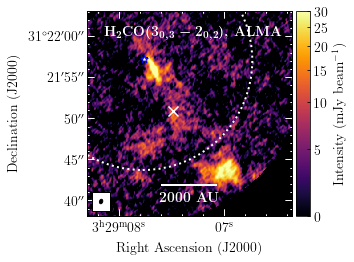

In [97]:
saveaction = 1
folder = 'ALMA/'
filename = folder+'Per50_H2COa_natural_noSC_clean_mom0_total'


savefile = filename + '_'+stretch + '.pdf'
vmin = 0
vmax = 30
vmid = 6
cmap = 'inferno'
title = r'\textbf{H\boldmath$_{2}$CO($3_{0,3}-2_{0,2}$), ALMA}'
stretch='arcsinh'

headercube = fits.getheader(filename+'.fits')
freq = headercube['RESTFRQ'] * u.Hz
phasecent = [headercube['obsra'], headercube['obsdec']]
wcscel = WCS(headercube).celestial
new_header = wcscel.to_header()
new_header['bmaj'] = headercube['bmaj']
new_header['bmin'] = headercube['bmin']
new_header['bpa'] = headercube['bpa']
new_hdu = fits.PrimaryHDU(data=fits.getdata(filename+'.fits')*1000,header=new_header)
fig = plot_aplpy_standard(new_hdu, stretch, vmin, vmax, cmap, label_col='w', star_col='b', vmid=vmid)
fig.colorbar.set_axis_label_text(r'Intensity (mJy beam$^{-1}$)')
fig.show_circles(phasecent[0], phasecent[1], ((26.7*u.arcsec).to(u.deg)*0.5).value, ls=':', color='w', lw=2)
fig.add_label(0.95,0.9, title, color='w',
               relative=True, horizontalalignment='right', size=14)
# fig.add_label(0.95,0.80, cleanalg, color='k',
#                relative=True, horizontalalignment='right', size=18)
fig.recenter(52.2805271, 31.3640439, (12.5*u.arcsec).to(u.deg).value)
fig.scalebar.set_label(r'\textbf{2000 AU}')
fig.set_nan_color('k')
plotpoint = [52.2811874,31.3641355]
fig.show_markers(plotpoint[0],plotpoint[1], c='w', s=100, marker='x')

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)

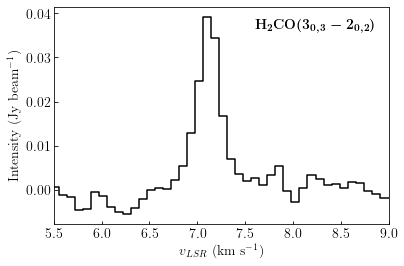

In [96]:
saveaction = 1
folder = 'ALMA/'
filename = folder+'Per50_H2COa_natural_noSC_clean'
cube = SpectralCube.read(filename+'.fits').with_spectral_unit(u.km/u.s, velocity_convention='radio')
wcscel = cube.wcs.celestial
x, y = wcscel.all_world2pix([52.2811874],[31.3641355],0)
spectra = cube[:,int(y[0]),int(x[0])]
vel = cube.spectral_axis.value

savefile = filename+'_sample_spectra.pdf'

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(vel,spectra,drawstyle='steps-mid', color='k')
ax.set_xlabel(r'$v_{LSR}$ (km s$^{-1}$)')
ax.set_ylabel(r'Intensity (Jy beam$^{-1}$)')
ax.set_xlim([5.5,9])
ax.annotate(r'\textbf{H\boldmath$_{2}$CO($3_{0,3}-2_{0,2}$)}',(0.6,0.9), xycoords='axes fraction', color='k', size=14)

if saveaction:
    plt.savefig(savefile, bbox_inches='tight', dpi=300)